# Homework nr. 2 - data cleaning (deadline 8/11/2018)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in details: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can. ;)

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  2. Check consistency of at least three features where you expect problems (include "Object Name" feature).
  3. Select some features where you expect integrity problems (describe your choice) and check integrity of those features.
  4. Convert at least five features to a proper data type. Choose at least one numeric, one categorical and one datetime.
  5. Find some outliers (describe your selection criteria).
  6. Detect missing data in at least three features, convert them to a proper representation (if they are already not), and impute missing values in at least one feature.

**If you do all this properly, you will obtain 6 points**

To earn **extra two points** you can do some of these:
  * Focus more precisely on cleaning of the "Medium" feature. Such if you like to use it in KNN based algorithms later.
  * Focus on the extraction of physical dimensions of each item (width, depth and height in centimeters) from the "Dimensions" feature.

## Comments

  * Please follow the instructions from https://courses.fit.cvut.cz/MI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, he can give you another chance to rework your homework and to obtain more points.

## Importing libraries
## Definition of some functions to get some info about data frame

In [1]:
import numpy as np
import pandas as pd
import sklearn as skit
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.stats import chi2_contingency

import seaborn as sns
import re
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#----------------------------------------------------------------------------------------------------------------------#
#-------FUNCTIONS-------FUNCTIONS-------FUNCTIONS-------FUNCTIONS-------FUNCTIONS-------FUNCTIONS-------FUNCTIONS------#
#----------------------------------------------------------------------------------------------------------------------#

def getUniqueAndPrint(df, column_name):
    array = df[column_name].unique()
    array = list(array)
    flag = 0
    for a in array:
         if type(a) == float:
            if math.isnan(a):
                array.remove(a)
                flag = 1
    array.sort()
    if flag == 1 :
        array.append(float('nan'))
    for a in array:
        print(a) 
    
def getRowInfo(row_num):
    try:
        col_arr = df.columns.values
        tmp = df.loc[[row_num]].values
        first_row = []

        for t in tmp:
            for a in t:
                first_row.append(a)

        tmp_dict =[]

        for i in range(len(first_row)):
            t_dict = {
                "col" : col_arr[i],
                "val" : first_row[i]
            }
            tmp_dict.append(t_dict)

        for d in tmp_dict:
            col = d.get("col")
            val = d.get("val")
            col = str(col)
            val = str(val)
            print(col + " : " + val)
    except KeyError as e:
        print(e)
    except Exception as e:
        print ("Unknown error")
        print(e)
         
#function to delete duplicate names of countries in a single cell
def deleteDuplicatesFromStr(str_to_change):
    str_to_change = str(str_to_change)
    array = str_to_change.split("|")

    tmp_array = []
    for a in array:
        if a in tmp_array:
            continue
        else:
            tmp_array.append(a)

    new_str = ''
    for a in tmp_array:
        if new_str == '':
            new_str += a
        else:
            new_str = new_str + "|" + a
            
    return new_str

#----------------------------------------------------------------------------------------------------------------------#
#-------FUNCTIONS-------FUNCTIONS-------FUNCTIONS-------FUNCTIONS-------FUNCTIONS-------FUNCTIONS-------FUNCTIONS------#
#----------------------------------------------------------------------------------------------------------------------#



## Downloading data about museum from csv file

In [2]:
#read data from file
df = pd.read_csv('MetObjects.csv', low_memory=False)

## Checking consistency of column 'Country'

In [3]:
getUniqueAndPrint(df,'Country')

Afghanistan
Afghanistan or Eastern Iran
Afghanistan or Iran
Afghanistan or Iran|Khurasan
Afghanistan or Northeastern Iran
Afghanistan or Turkmenistan
Afghanistan|Afghanistan
Afghanistan|present-day Afghanistan
Africa
Alamania
Alamanian|Northern France
Alamania|France
Alamania|Northern France
Alamania|Northern France|Germany
Albania
Alexandria
Alexandria (?), Panopolis (Akhmim) (?)
Alexandria or Egypt, Syria, Constantinople (?)
Algeria
Algeria or Morocco
Algeria?
Algieria
America
Amman
Amman (?)
Anatolia|Turkey
Angola
Angola or Democratic Republic of the Congo
Antioch
Arabia
Arabia or North Africa
Arabian Peninsula
Arabia|Iran
Argentina
Argentina, Peru, or Bolivia
Armenia
Armenia or Turkey
Austral Islands
Australia
Australia or Papua New Guinea
Austria
Austria (mounts)
Austria (now Italy, Trentino-Alto Adige)
Austria (possibly)
Austria / Germany
Austria ?
Austria or Germany
Austria?
Austrian
Azerbaijan
Azerbaijan, Armenia or Georgia
Azerbaijian?
Belgian Congo (Democratic Republic of the

## Cleaning data from column 'Country'

The data in column 'Country' is really inconsistent so I decided to clean it

In [4]:
#Repairing consistency of Counrty
df['Country'].replace(regex=True,inplace=True,to_replace='Germany',value=r'TEMP_GERMANY')
df['Country'].replace(regex=True,inplace=True,to_replace='German',value=r'TEMP_GERMANY')
df['Country'].replace(regex=True,inplace=True,to_replace='TEMP_GERMANY',value=r'Germany')
df['Country'].replace(regex=True,inplace=True,to_replace='United States of America',value=r'TEMP_UNITED_STATES_OF_AMERICA')
df['Country'].replace(regex=True,inplace=True,to_replace='United States',value=r'TEMP_UNITED_STATES_OF_AMERICA')
df['Country'].replace(regex=True,inplace=True,to_replace='USA',value=r'TEMP_UNITED_STATES_OF_AMERICA')
df['Country'].replace(regex=True,inplace=True,to_replace='US',value=r'TEMP_UNITED_STATES_OF_AMERICA')
df['Country'].replace(regex=True,inplace=True,to_replace='U.S.A.',value=r'TEMP_UNITED_STATES_OF_AMERICA')
df['Country'].replace(regex=True,inplace=True,to_replace='TEMP_UNITED_STATES_OF_AMERICA',value=r'United States of America')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(modern\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(Hungary\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(mounts\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(now Italy, Trentino-Alto Adige\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Russia Federation',value=r'Russia')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Russian Federation',value=r'Russia')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Russian',value=r'Russia')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Bosnia\Z',value=r'Bosnia and Herzegovina')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Bosnia - Herzegovina',value=r'Bosnia and Herzegovina')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Nigeriq',value=r'Nigeria')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Burmah',value=r'Burma')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Brazzaville',value=r'Republic of Congo')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Algieria',value=r'Algeria')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Belgian Congo',value=r'Democratic Republic of the Congo')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Democratic Republic of Congo',value=r'Democratic Republic of the Congo')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(former Yugoslavia\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(formerly Upper Volta\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\[Republic of Congo\]',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\[enamels\]',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(Bohemia\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(British repro\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(France\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(north\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(Persia\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(modern Afghanistan\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'found at Ashkelon',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(former Yugoslavia0',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(Burma\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(formerly Burma\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'Myanmar',value=r'Burma')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(Phillipine\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(Mexico\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(Spain\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(made in England\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(made in Western Europe\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(box\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(lid\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(possibly Sweden\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(Setting\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(Celebes\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(Alexandria\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(possibly Kpandu\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(Democratic Republic of the Congo\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(Akhmim\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(Mafraq\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(Azraq al Shishan\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\[Republic of the Congo\]',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\[Republic of Benin\]',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(part of  Cairo\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(Jerash\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(present day France\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(present-day France\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(now eastern Turkey\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\[Republic of the Congo\]',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(old cat. Arabia\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\[Burundi\]',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='Yugoslavia \(former\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='Dem. Rep. Congo',value=r'Democratic Republic of the Congo')
df['Country'].replace(regex=True,inplace=True,to_replace='Dem. Rep. of Congo',value=r'Democratic Republic of the Congo')
df['Country'].replace(regex=True,inplace=True,to_replace="Côte d'Ivoire",value=r"Cote d'Ivoire")
df['Country'].replace(regex=True,inplace=True,to_replace="Côte d’Ivoire",value=r"Cote d'Ivoire")
df['Country'].replace(regex=True,inplace=True,to_replace='NEW ZEALAND ROTORUA WHAKAREWAREWA',value=r'New Zealand')
df['Country'].replace(regex=True,inplace=True,to_replace='\(North\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(Jordan\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='\(Ivory Coast\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='probably',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='Probably',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='probbly',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='prbably',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='possibly',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='posssibly',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='present-day',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='Present-day',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace='perhaps',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r',',value=r'|')
df['Country'].replace(regex=True,inplace=True,to_replace=r' or ',value=r'|')
df['Country'].replace(regex=True,inplace=True,to_replace=r'/',value=r'|')
df['Country'].replace(regex=True,inplace=True,to_replace=r': N.A.',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r':N.A.',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r':N.',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\?',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\(\)',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\A ',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\A( )*',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'( )*\Z',value=r'')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\|\|',value=r'|')
df['Country'].replace(regex=True,inplace=True,to_replace=r' \| ',value=r'|')
df['Country'].replace(regex=True,inplace=True,to_replace=r' \|',value=r'|')
df['Country'].replace(regex=True,inplace=True,to_replace=r'\| ',value=r'|')
df['Country'].replace(regex=True,inplace=True,to_replace=r'( )+',value=r' ')

df['Country'] = df['Country'].apply(lambda x: deleteDuplicatesFromStr(x))

#in the end we will make all country names to start with uppercase
#df['Country'] = df['Country'].astype(str)
#df['Country'] = df['Country'].apply(lambda x: x[0].upper()+x[1:])

After cleaning this data we see that now unique values from column 'Country' are consistent enough.
I think that I can't done it better or it is not worth the effort. Maybe it can be done in better way than such a lot of lines which look almost the same, but optimization wasn't a point of this exercise.

In [5]:
getUniqueAndPrint(df,'Country')

Afghanistan
Afghanistan|Central Asia
Afghanistan|Eastern Iran
Afghanistan|Iran
Afghanistan|Iran|Khurasan
Afghanistan|Italy
Afghanistan|Northeastern Iran
Afghanistan|Turkmenistan
Africa
Alamania
Alamanian|Northern France
Alamania|France
Alamania|Northern France
Alamania|Northern France|Germany
Albania
Alexandria
Alexandria|Egypt|Syria|Constantinople
Alexandria|Panopolis
Algeria
Algeria|Morocco
America
Amman
Anatolia|Turkey
Angola
Angola|Democratic Republic of the Congo
Antioch
Arabia
Arabian Peninsula
Arabia|Iran
Arabia|North Africa
Argentina
Argentina|Peru|Bolivia
Armenia
Armenia|Turkey
Austral Islands
Australia
Australia|Papua New Guinea
Austria
Austrian
Austria|Germany
Azerbaijan
Azerbaijan|Armenia|Georgia
Azerbaijian
Bangladesh
Belgium
Belgium|England|France
Belgium|France
Belize
Belize|Honduras|Guatemala|Mexico
Benin
Benin|Gabon
Bermuda
Bhutan
Black Sea
Bohemia
Bohemia|Germany|Italy
Bolivia
Bolivia|Peru
Borneo
Borneo|China
Bosnia
Bosnia and Herzegovina
Brazil
Brazil|Portugal
Britia

## Checking consistency of columns 'Geography Type' and 'Object Name'

In [6]:
print("Geography Type")
getUniqueAndPrint(df,'Geography Type')
print()
print()
print("Object Name")
getUniqueAndPrint(df,'Object Name')

Geography Type
(none assigned)
(none assigned)|Country of Origin
Attributed to
Attributed to|Attributed to
Attributed to|Country of Origin
Attributed to|Decorated in
Attributed to|Excavated in
Attributed to|Found
Attributed to|Found/excavated
Attributed to|Made in
Attributed to|Probably from
Country of Origin
Country of Origin|(none assigned)
Country of Origin|Attributed to
Country of Origin|Attributed to|Found
Country of Origin|Country of Origin
Country of Origin|Current location|Made in
Country of Origin|Excavated in
Country of Origin|Found
Country of Origin|Found/excavated
Country of Origin|From
Country of Origin|Made for
Country of Origin|Made in
Country of Origin|Mint
Country of Origin|Possibly from
Country of Origin|Probably from
Country of Origin|Probably made in
Decorated in|Made in
Depicted
Designed in
Excavated in
Excavated in|Attributed to
Excavated in|Country of Origin
Excavated in|Made in
Excavated in|Mint
Formerly considered made in
Formerly considered made in|Formerly co

Amulet, ox head, foundation deposit, Tawosret
Amulet, oxyrhynchus fish
Amulet, papyrus capital
Amulet, papyrus column
Amulet, papyrus roll
Amulet, papyrus scepter
Amulet, papyrus scepter, Nesenaset
Amulet, papyrus scepter, wadj
Amulet, pataikos
Amulet, pear-shaped
Amulet, pectoral
Amulet, phallus (?)
Amulet, pig
Amulet, pig (?)
Amulet, pillow charm
Amulet, plaque
Amulet, plaque with wadjet eye, Nesenaset
Amulet, plaque, Hathor
Amulet, plaque, bound ox, foundation deposit, Tawosret
Amulet, plaque, cartouche
Amulet, plaque, cartouche, lions (?)
Amulet, plaque, cartouche, ox leg, foundation deposit, Tawosret
Amulet, plaque, monkey, Ramesses II
Amulet, plaque, oval
Amulet, plaque, oval, Amenhotep III
Amulet, plaque, ox head, foundation deposit, Tawosret
Amulet, plaque, private, scorpions, lizards
Amulet, plaque, rectangular
Amulet, plaque, rectangular,  Khonsu
Amulet, plaque, rectangular, Amenhotep II
Amulet, plaque, rectangular, Amenhotep III
Amulet, plumes
Amulet, polymorphic deity
Amule

Bell-krater Fragments
Bell-krater fragment
Bell-krater fragments
Bell-krater with lid
Bell-shaped object
Bellarmine jug
Bellows
Bellows model
Bellpull
Bells
Bells and Stand
Bells, probably for a horse harness
Belt
Belt 
Belt (Money)
Belt Buckle
Belt Hangings 

Belt Hook
Belt Plate
Belt Rattle
Belt and buckle
Belt and carrier for rapier
Belt and pouch
Belt attachments
Belt back plate
Belt buckle
Belt buckle and belt plate
Belt buckle and plaques
Belt buckle and tongue
Belt buckle plate
Belt buckle, girdle, Senebtisi (from 08.200.29*)
Belt buckles
Belt carrier with powder flask and pouch for chargers
Belt clasp
Belt counter plate
Belt end
Belt fitting
Belt fittings
Belt hangings
Belt hole guard
Belt hook
Belt hook (?)
Belt hooks
Belt loop and plate
Belt mount
Belt or harness plate
Belt or sash
Belt ornament
Belt ornament (?)
Belt ornaments
Belt pendant
Belt plaque
Belt plaque

Belt plaques
Belt plate
Belt plate and buckle loop
Belt plate and loop
Belt plate fragment
Belt pouch
Belt slide

Bǎn (clapper)
Cabasa
Cabasset
Cabasset in late 16th century style
Cabinet
Cabinet

Cabinet  card
Cabinet Card
Cabinet Cards
Cabinet Piano
Cabinet card
Cabinet card; Photograph
Cabinet cards
Cabinet containing boxes
Cabinet door
Cabinet of drawers
Cabinet of plaques
Cabinet on stand
Cabinet or house altar
Cabinet panel
Cabinet panels
Cabinet top
Cabinet with drawers
Cabinet-vitrine
Cable
Cabrette
Cacha Rattle
Cache-Sexe
Cache-sexe
Cachepot
Cachepot with stand
Cachepots
Caddinet
Caddy
Caddy spoon
Caddy with cover
Cadet short sword and scabbard
Caftan
Cage crinoline
Cage cup, fragment
Cage with rabbits
Cake Saw
Cake basket
Cake bowl
Cake box
Cake box (?)
Cake box in tiers
Cake dish
Cake jar
Cake plate
Cake server
Cake stand
Cake tray
Calabash Drum
Calascione
Calash
Caldron
Calendar
Calendar frame
Calendar sword
Calendar watch
Calendar with sundial
Calendars
Caligula dish from FMA + Caligula figure from Schroder
Caliper and level
Calligraphic painting
Calligraphic panel
Calligraphy
Calot
C

Collar stud
Collar terminal
Collar; pectoral element
Collared jar
Collaret
Collarette
Collection Ornament & Architecture
Collection Ornament & Architecture; drawing
Collection cup
Collection of Beating Reeds
Collection of chess sets and chessmen
Collection of keys and locks
Collier flintlock revolver
Cologne bottle
Colonette
Colonnette
Colonnettes
Coloring matter
Coloring matter (2)
Colt revolver
Column
Column 
Column Base and Capital
Column Capital
Column Capital, papyrus
Column base
Column capital
Column capital, Bes-image
Column drum element
Column fragment
Column fragment, octagonal, Horus
Column krater, fragments
Column shaft
Column statue
Column with Base
Column with base
Column, Bes, antelope
Column, Hathor-emblem capital, Nectanebo I
Column, Sahure, palm capital
Column, capital, Unis ?
Column, with Ionic Capital
Column-krater
Column-krater with built-in psykter
Column-krater with panel relief
Column-krater, fragment
Column-krater, fragments
Columns
Comb
Comb (?)
Comb and pin
Co

Dilruba
Dinar
Dining Room
Dining Table
Dining room
Dining room set
Dining service case
Dining table
Dinner blouse
Dinner cloche
Dinner dress
Dinner ensemble
Dinner fork
Dinner hat
Dinner jacket
Dinner knife
Dinner napkin
Dinner oxfords
Dinner pail
Dinner pail with cover
Dinner plate
Dinner pumps
Dinner sandals
Dinner service
Dinner shoes
Dinner suit
Dinner toque
Dinner trousers
Dinner vest
Dinnerware
Dinos
Dinos, fragment
Dinos, fragmentary
Dinos, miniature
Diorama
Diple
Diple sa mješinom
Dipper
Dipper fragment
Dipper juglet, Levantine painted ware
Diptych
Diptych leaf
Diptych of hanging scrolls
Diptych wing
Dirk
Dirk or knife
Dirk with sheath
Dirk with sheath and knife
Dirk with sheath chapes
Dirk with sheath, knife and fork
Dirk with sheath, knife, and fork
Dirk with two sheaths
Disc
Disc (Bi)
Disc Rattle
Disc bead
Discs
Dish
Dish

Dish 
Dish (one of two)
Dish Cross
Dish Fragment, Tiye
Dish Handle
Dish Saucer
Dish and cover
Dish cover
Dish cross
Dish fragment
Dish fragment, Apries
Di

Facsimile, Senet (TT 60), Intefiqer, priestesses, dancers
Facsimile, Sennedjem (TT 1), Iaru
Facsimile, Sennedjem, TT 1, cat, serpent
Facsimile, Sennefer (TT 96), cat
Facsimile, Senwosretankh's false door
Facsimile, Siptah (KV 47)
Facsimile, St. Michael
Facsimile, TT 226
Facsimile, TT 226, bull
Facsimile, TT 226, offering procession, bull
Facsimile, TT 52, ceiling
Facsimile, TT 52, false door, offerings
Facsimile, TT 52, fishing, fowling, wine making, clap net,
Facsimile, TT 52, north wall, offering scenes, Nakht, Tawy
Facsimile, TT 52, offering
Facsimile, TT 52, offering, Nakht, Tawy
Facsimile, TT 52, offering, agriculture, Nakht, Tawy
Facsimile, Temple of Amun
Facsimile, Temple of Hatshepsut,  Seniseneb
Facsimile, Tetiky (TT 15), ceiling
Facsimile, Thebes
Facsimile, Thutmose III
Facsimile, Tjay (TT 349), ceiling
Facsimile, Tjay (TT 349), kheker
Facsimile, Tjay (TT 349), reaping
Facsimile, Tjay (TT 349), statues
Facsimile, Tjeneny (TT 74), Nubian soldiers
Facsimile, Tjener (TT 101), of

Game piece, cane disk
Game piece, conical
Game piece, conical, burial 8
Game piece, jackal
Game piece, knuckle bone
Game piece, knuckle bone, Omphale
Game piece, lion
Game piece, marble
Game piece, musical peg (?)
Game piece, pyramid
Game piece, spool
Game piece, spool, burial 8
Game pieces
Game pieces (8), knucklebones (2)
Game rack
Game table
Game, Box, Cards
Gameboard
Gamelan
Gamer or Toys
Gaming or chess piece
Gaming piece
Gaming piece or stone object
Gaming piece possibly
Gaming pieces (7)
Gaming pieces (8)
Gaming purse
Ganga?
Gangsa Dasa
Gangsingan
Ganymede Jewelry
Gaohu
Garden bench
Garden chair
Garden seat
Garden settee
Garden table
Garland
Garland fragment
Garland holder
Garland, Nany
Garlands
Garment
Garment box
Garment fragment
Garment fragment (?)
Garment fragment , probably male, pleats
Garment fragment, sash kilt (?), knee
Garment hook
Garment plaque
Garment pleats
Garment rack
Garniture
Garniture or mounting
Garniture or papillon
Garter Belt
Garters
Garuda finial
Gas We 

Hnai
Hnyìn
Hnè
Ho Sho
Hob grate
Hoe
Hoe blade
Hoe blade, owner's mark
Hokei
Hol (drum)
Holder for magic straws
Holster
Holy place curtain
Holy water basin
Holy water bottle
Holy-oil casket
Holy-water font
Holy-water stoup
Holy-water stoup and sprinkler
Holy-water vessel
Homburg
Hone with case
Honey Dish
Honey bowl
Honey dish
Honey pot
Honorary Post Horn in E-flat
Hood
Hood for camp wear
Hood for falcon
Hood from a Cope
Hood from a cope
Hood of Mail
Hood of mail
Hood of mail and plate
Hoof Rattle Strap
Hoof, cow
Hook
Hook Harp
Hook buckle
Hook for weaving
Hook from a belt
Hook or pendant
Hook, rope
Hook-shaped object
Hooked Harp
Hooks
Hoops
Hora
Horagai
Horagai or Rappakai
Horanawa
Horizontal panel
Horizontal scroll
Horn
Horn (Oliphant) with case
Horn Groove (Sipar)
Horn in B-flat
Horn in D
Horn in F
Horn-like object
Horn-shaped cup
Horn-shaped vessel
Hornbill figure
Horo
Horo and oikago
Horse armor
Horse bell
Horse bit
Horse bit 
Horse bit and cavesson (noseband)
Horse bit cheekpiece
H

Knife or razor handle, Herakles
Knife ornament
Knife rest
Knife scabbard
Knife sheath
Knife urn
Knife with Sheath
Knife with ram's head
Knife with sheath
Knife with sheath and chopsticks
Knife with sheath and small knife
Knife with sheath, belt, and chopsticks
Knife with sheath, chopsticks and belt loop
Knife with sheath, chopsticks, and earspoon
Knife with sheath, chopsticks, pickle spear and picks
Knife with sheath, chopsticks, pickle spear and toothpicks
Knife with sheath, chopsticks, picks, and earspoon
Knife, ax head
Knife, bifacial
Knife, curved
Knife, fish tail
Knife, fishtail
Knife, fishtail shape
Knife, flaked
Knife, fork and scabbard
Knife, fork and skewer needle with case
Knife, fork, and pen knife
Knife, fork, and spoon
Knife, holder, chopsticks
Knife, khepesh, Amenemhat
Knife, large
Knife, rhomboidal
Knife, ripple-flaked
Knife, votive
Knife-sharpener
Knife-spoon
Knife?
Knifebox with cover
Knightly sword
Knitting needles
Knives
Knives and forks
Knob
Knob (?), Aya
Knob (?), 

Mirror 
Mirror ? or plate
Mirror Case
Mirror Handle (?), scaled animal with tail
Mirror and case
Mirror and needlecase
Mirror back
Mirror back (?)
Mirror case
Mirror case cover
Mirror case valve
Mirror case with cover
Mirror clock
Mirror cover
Mirror cover, fragmentary
Mirror disk
Mirror fragment
Mirror frame
Mirror frame fragment
Mirror frame panel
Mirror handle
Mirror handle (?), papyrus umbel
Mirror handle top
Mirror handle, Bes
Mirror handle, Bes head
Mirror handle, cat head
Mirror handle, papyrus umbel
Mirror knob
Mirror knobs
Mirror model
Mirror mount
Mirror or lid
Mirror or light reflector
Mirror panel
Mirror stand
Mirror stand with girl
Mirror stand with woman
Mirror stand, woman with fillet
Mirror support
Mirror support ? with Aphrodite
Mirror support with girl
Mirror support with man with horses on shoulders
Mirror support, girl with frog
Mirror with Achilles and Memnon
Mirror with Admetus and Alkestis
Mirror with Aphrodite and Eros
Mirror with Aphrodite and Erotes
Mirror wit

Ornament (?)
Ornament (Ruyi)
Ornament ? Tassel ?
Ornament base (?)
Ornament cone
Ornament detail
Ornament fragment
Ornament fragment, glass, bead
Ornament from wig
Ornament in the form of a duck
Ornament in the form of a fish
Ornament in the form of a griffin/rosette
Ornament in the form of a lion
Ornament in the form of a seated male sphinx
Ornament in the form of a shell
Ornament in the form of a shield
Ornament in the form of an ivy leaf
Ornament in the form of two ducks
Ornament of horse trapping
Ornament or Plaque
Ornament or carding comb
Ornament or casing, engraved
Ornament or head of a pin
Ornament print from a firearms pattern book
Ornament with mask
Ornament, Hair ring
Ornament, Horus falcon
Ornament, Palmette
Ornament, Rosette
Ornament, Rosette fragment
Ornament, Wig tubes
Ornament, ball
Ornament, daisy
Ornament, disc
Ornament, disk
Ornament, dress
Ornament, dress (dish)
Ornament, dress, bead
Ornament, dress, boss
Ornament, dress, daisy
Ornament, flower
Ornament, flower-shap

Pigment tablets
Pigment tube
Pike
Pikeman's Helmet

Pikeman’s armor
Pilaster
Pilaster base
Pilaster capitals
Pilaster capitals

Pilaster end
Pilaster fragment
Pilaster panel
Pilaster panels
Pilaster relief with floral design
Pilaster shaft
Pilasters
Pilasters, 2
Pileus
Pilgrim badge
Pilgrim bottle
Pilgrim bottle 
Pilgrim bottle fragment
Pilgrim bottle with cover
Pilgrim bottle with screw top
Pilgrim flask
Pilgrim staff (Shakujo)
Pilgrim vase
Pilgrim's badge
Pilgrim's badge fragment
Pilgrim's bottle
Pilgrim's cup
Pilgrims' tokens
Pill box
Pillar
Pillar barometer
Pillar dial
Pillar fragment
Pillar rug
Pillar top
Pillar with capital
Pillar with snake and wreath
Pillar, Nefertiti cartouche
Pillbox hat
Pillow
Pillow base
Pillow bolster
Pillow cover
Pillow sham
Pillow slip
Pillow spear with sheath (Makura Yari)
Pillow sword
Pillow sword with scabbard
Pillow, Elbow
Pillowcase
Pillowcases
Pilsner glass
Pin
Pin 
Pin (?)
Pin beater
Pin beaters
Pin cushion
Pin head
Pin holder with cover
Pin or br

Relief of horse legs
Relief of mourners at a funeral
Relief of mythological group
Relief of the Attendants of the Governor of the Hare Nome Djehutyhotep II
Relief of the Goddess Hathor
Relief of the homecoming of Odysseus
Relief of three men, votive
Relief of two horses
Relief of two votaries
Relief of woman, Herakles, Artemis, and gorgon
Relief panel
Relief pediment, sea monster
Relief plaque
Relief plaque, unfinished, smiting king
Relief portrait
Relief sculpture
Relief statue
Relief statuette
Relief tondo
Relief tondo with portrait of a family
Relief vase, rim fragment
Relief with Crocodile and Fish
Relief with fish
Relief with lunette showing Nereid riding on a Triton
Relief with masks
Relief with prizes of Panhellenic games
Relief, , Tomb of Neferu
Relief, 2 mourners
Relief, Akhamenru
Relief, Akhenaten, parapet
Relief, Akhtihotep
Relief, Amenemhat I
Relief, Amenemhat I and Senwosret I
Relief, Asiatic prisoner
Relief, Atum, Hatshepsut
Relief, Bes Pantheos
Relief, Bes, Harsomtous
Re

Scarab, Ramesses I
Scarab, Ramesses II
Scarab, Ramesses II, Maat
Scarab, Ramesses II, Ptah
Scarab, Ramesses II, smiting
Scarab, Ramesses III
Scarab, Ramesses III (?)
Scarab, Ramesses III,
Scarab, Ramesses IV
Scarab, Ramesses IV, royal name
Scarab, Ramesses V
Scarab, Ramesses VII
Scarab, Ramesses XIII
Scarab, Re
Scarab, Re first prophet of Menkheperre and praised of Amun in the Henket-ankh
Scarab, Re, hieroglyphs, rdi ra
Scarab, Re-Harakhty
Scarab, Ruiu
Scarab, Ruiu, Horus, crocodile
Scarab, Ruiu, protective hieroglyphs
Scarab, Ruiu, scroll, nefer
Scarab, Sacred Boat, Thutmose III
Scarab, Sacred Goose of Amun, Thutmose IV
Scarab, Sakhmet
Scarab, Sakhmet, sA protection, nb, hieroglyphs
Scarab, Sankhibre
Scarab, Satsobek, scrolls, nefer
Scarab, Scribe Djehutymose
Scarab, Sebek
Scarab, Sebekemsaf
Scarab, Sebekhotep
Scarab, Sebekhotep III
Scarab, Sebekhotep IV
Scarab, Sebekhotep V, genealogical royal name scarab, Nubhotepti
Scarab, Sebeknakht
Scarab, Sebekre?
Scarab, Sedjefakare, Amenemhat 

Sheet, hemmed, missing mark
Sheet, hemmed, missing mark, badly torn
Sheet, hemmed, missing mark, much worn
Sheet, hemmed, missing mark, very worn
Sheet, hemmed, repaired, missing mark
Sheet, inscribed,  linen mark, medium spin, irregular weave
Sheet, inscribed, linen mark
Sheet, inscribed, linen mark, coarse spin, loose weave
Sheet, inscribed, linen mark, fine spin, irregular weave
Sheet, inscribed, linen mark, medium fine spin, loose weave
Sheet, inscribed, linen mark, medium spin, close weave
Sheet, inscribed, linen mark, medium spin, irregular weave
Sheet, inscribed, linen mark, medium spin, medium weave
Sheet, inscribed, linen mark, pall
Sheet, inscribed, linen mark, weavers marks, coarse spin, loose weave
Sheet, inscribed, linen mark, weavers marks, fine spin, close weave
Sheet, inscribed, linen mark, weavers marks, fine spin, loose weave
Sheet, inscribed, linen mark, weavers marks, fine spin, medium weave
Sheet, inscribed, linen mark, weavers marks, fine spin, rather loose weave


Statuette of Eros holding an apple
Statuette of Eros holding duck
Statuette of Eros holding swan
Statuette of Eros holding swan ?
Statuette of Eros in cloak
Statuette of Eros kneeling
Statuette of Eros on a boar
Statuette of Eros on a lion
Statuette of Eros reclining
Statuette of Eros riding a goat
Statuette of Eros seated
Statuette of Eros sleeping
Statuette of Eros with grapes
Statuette of Eros, winged
Statuette of Europa on the bull
Statuette of Fortuna
Statuette of Harpokrates
Statuette of Harpokrates crouching
Statuette of Harpokrates reclining
Statuette of Hekate
Statuette of Hekate (Hekataion)
Statuette of Herakles
Statuette of Herakles and Triton
Statuette of Herakles holding a miniature lion in his left hand
Statuette of Herakles with a fillet
Statuette of Herakles with club
Statuette of Herakles with fillet
Statuette of Herakles with lion's skin
Statuette of Herakles with round object
Statuette of Herakles with the lion
Statuette of Herakles, bearded
Statuette of Herakles, dr

Talatat, Grapevine
Talatat, Nubian soldiers
Talatat, Nubians
Talatat, Royal hand
Talatat, architecture and head
Talatat, attendant holding an offering table
Talatat, attendants
Talatat, bedroom and storerooms
Talatat, bird
Talatat, birds
Talatat, cartouches of Aten
Talatat, cartouches, Akhenaten, Aten, Kiya
Talatat, charioteer
Talatat, chariots
Talatat, construction scene
Talatat, courtier
Talatat, courtier, architectural border
Talatat, courtiers
Talatat, courtiers, Nefertiti
Talatat, courtiers, women
Talatat, courtyards
Talatat, dancer's feet, women in jubilation
Talatat, dancers, musicians
Talatat, desert scene
Talatat, fan sticks, official's head (joins 1991.240.2)
Talatat, fans, name of Merytaten (joins 1991.240.3)
Talatat, feet of royal person and princess
Talatat, fishing, fowling
Talatat, floral wall decoration
Talatat, flowers
Talatat, flowers, fruit
Talatat, foreign musicians
Talatat, foreign soldiers
Talatat, foreigners
Talatat, fruit bowl
Talatat, grain
Talatat, head and fo

Vase in the form of a pomegranate
Vase in the form of a pygmy carrying a dead crane
Vase in the form of a pyxis surmounted by an oinochoe
Vase in the form of a ram
Vase in the form of a sandaled left foot
Vase in the form of a sandaled right foot
Vase in the form of a satyr
Vase in the form of a seated Eros (?)
Vase in the form of a shoe
Vase in the form of a sleeping black-African boy
Vase in the form of a squatting man
Vase in the form of a swan
Vase in the form of a woman's head
Vase in the form of an animal
Vase in the form of an ape
Vase in the form of two cockle shells
Vase in the form of two heads
Vase lid
Vase lid, miniature
Vase mount
Vase mounts
Vase neck
Vase on stand
Vase or clock ornament
Vase or jar
Vase or lamp
Vase or pencil holder
Vase ornament
Vase ornament (?)
Vase ornaments
Vase rim
Vase sample
Vase spout, Tell el-Yahudiya ware
Vase stand
Vase with birds and finial
Vase with cover
Vase with cover 
Vase with cover and base
Vase with flowers
Vase with four handles
Vas

## Repairing consistensy of those columns

- In column Geography Type there are some values with are duplicated so I used my function 'deleteDuplicatesFromString' to repair it

- In column 'Object Name' there are some inconsistencies like 'Album : sth' and 'Album sth', but it is too much of records to repair it really well.

In [7]:
df['Geography Type'] = df['Geography Type'].apply(lambda x: deleteDuplicatesFromStr(x))

Checking how it looks after repairs

In [8]:
print("Geography Type")
getUniqueAndPrint(df,'Geography Type')

Geography Type

(none assigned)
(none assigned)|Country of Origin
Attributed to
Attributed to|Country of Origin
Attributed to|Decorated in
Attributed to|Excavated in
Attributed to|Found
Attributed to|Found/excavated
Attributed to|Made in
Attributed to|Probably from
Country of Origin
Country of Origin|(none assigned)
Country of Origin|Attributed to
Country of Origin|Attributed to|Found
Country of Origin|Current location|Made in
Country of Origin|Excavated in
Country of Origin|Found
Country of Origin|Found/excavated
Country of Origin|From
Country of Origin|Made for
Country of Origin|Made in
Country of Origin|Mint
Country of Origin|Possibly from
Country of Origin|Probably from
Country of Origin|Probably made in
Decorated in|Made in
Depicted
Designed in
Excavated in
Excavated in|Attributed to
Excavated in|Country of Origin
Excavated in|Made in
Excavated in|Mint
Formerly considered made in
Formerly considered made in|Made in
Formerly considered made in|Possibly made in
Formerly considered m

## Integrity of some features

I want to check integrity of such groups of features:
- 'Object Begin Date' and 'Object End Date'
- 'Artist Display Name', 'Artist Begin Date' and 'Artist End Date'

Object Begin Date should be less or equal Object End Date. If this condition is not fulfilled then it means that there is some failure and there is no integrity in this row.

In [9]:
#checking the integrity of begin and end date. We don't want begin date which is later than end date
count = 0
for i in range(len(df)):
    begin = df.at[i,'Object Begin Date']
    end = df.at[i,'Object End Date']
    
    if begin > end :
        count+=1
        
perc = count/len(df)*100
perc = str(round(perc,3)) + '%'
print(count)
print(perc)

199
0.042%


- There is just 199 objects with no integrity of 'Object Begin Date' and 'Object End Date'
- It is just around 0.4 % of all data.

## Integrity of data about artists
- not every rows has informations about artist(s)
- there can be more than one artist associated with one object
- there should be the same amount information stored in 'Artist Display Name', 'Artist Begin Date' and 'Artist End Date'
- begin date for single artist should be less than end date for single artist

In [10]:
def my_split(my_string):
    tmp_str = re.sub(r'\|',"  ",my_string)
    tmp_str = re.sub(r'\A( )*','',tmp_str)
    tmp_str = re.sub(r"( )+"," ",tmp_str)
    tmp_str_arr = tmp_str.split(" ")
    return tmp_str_arr

not_equal_num_of_elem = 0
bad_dates = 0
nan_values = 0
good_dates = 0
all_values  = len(df)

for i in range(all_values):
    
    begin_dates = df.at[i,'Artist Begin Date']
    end_dates = df.at[i,'Artist End Date']
    names = df.at[i,'Artist Display Name']
    
    begin_dates = str(begin_dates)
    end_dates = str(end_dates)
    names = str(names)
    
    t_names = my_split(names)
    t_begin_dates = my_split(begin_dates)
    t_end_dates = my_split(end_dates)
    
    
    if ( len(t_names) != len(t_begin_dates)) | (len(t_begin_dates) != len(t_end_dates)) | (len(t_names) != len(t_end_dates)):
        not_equal_num_of_elem+=1
        continue
        
    for j in range(len(t_begin_dates)):
        begin_date = t_begin_dates[j]
        end_date = t_end_dates[j]
        
        
        if begin_date[0] == '-':
            begin_date = begin_date[:5]
        else:
            begin_date = begin_date[:4]
        
        if end_date[0] == '-':
            end_date = end_date[:5]
        else:
            end_date = end_date[:4]
        
        begin_date = float(begin_date)
        end_date = float(end_date)
        
        if math.isnan(begin_date) | math.isnan(end_date) :
            nan_values+=1
            break
        
        if begin_date > end_date:
            bad_dates+=1
            break
        else :
            good_dates+=1
            break
    

print("All values = ",all_values)
print("Not equal number of elements = ",not_equal_num_of_elem)
print("Wrong dates = ",bad_dates)
print("Good dates = ", good_dates)
print("NaN Values = ", nan_values)

if all_values == (not_equal_num_of_elem+bad_dates+good_dates+nan_values):
    print("All values were checked.")
else :
    print("Not all all values were checked.")


All values =  472463
Not equal number of elements =  195945
Wrong dates =  15
Good dates =  80831
NaN Values =  195672
All values were checked.


We can see that there is a lot of missing values about artists and not the same amount of information about artist name, artist begin date and artists end date. But if data is well formatted then almost all records have good integrity about begin and end date of artist.

## Integrity of column 'Object Date'
- this is the last feature which integrity I would like to check

In [11]:
#checking column Object Date
getUniqueAndPrint(df,'Object Date')

 1827

 c.1880
 ca. 1500
 ca. 1510–20
 ca. 1720
 ca. 1730–40
 ca. 1745
 ca. 1750–70
 ca. 1755
 ca. 1770–80
 ca. 1790
 ca. 1840s
 early 18th century
 part I, 1817 and II, 1819
(1625)
(1646)
(1785)
(3200–2000 B.C.) – (1368–1644 A.D.)
(?) 1775–1805
(model), Montbéliard, late 16th century
(priv.) 1649, (pref.) 1651
(right screen) late 16th–early 17th century; (left screen) early to mid-17th century
0
1 B.C.–A.D. 700
1 September–21 October 1855
10/1890
100 B.C.
100 B.C.–100 A.D.
100 B.C.–200 A.D.
100 B.C.–200 A.D.?
100 B.C.–A.D. 100
100 B.C.–A.D. 200
100 B.C.–A.D. 250
100 B.C.–A.D. 300
100 B.C.–A.D. 364
100 B.C.–A.D. 400
100 B.C.–A.D. 800
100 B.C.–A.D.800
100 BC–100 AD
100 BC–200 AD
100 BC–200 AD ?
100 BC–200 AD?
100 BC–300 AD
1000 (ivory); before 1085 (setting)
1000 B.C.–A.D. 400
1000 B.C.–A.D. 500
1000–1050
1000–1100
1000–1200
1000–1300
1000–1350
1000–1476
1000–1500 A.D.
1000–1600
1000–30 BC
1000–300 B.C.
1000–300 BC
1000–400 B.C.
1000–500 B.C. (?)
1000–800 B.C.
1005
1007
100–200
100–30 B

150–100 B.C.
150–125 B.C.
150–180
150–50 B.C.
150–50 BC
1510
1510 (?)
1510–15
1510–1513
1510–1520 (published 1608)
1510–20
1510–25
1510–28
1510–30
1510–36
1510–50
1510–61
1510–63
1510–65
1510–75
1510–76
1510–84
1510–85
1510–92
1511
1511–14
1511–51
1511–74
1511–87
1511–92
1512
1512–13
1512–15
1512–1600
1512–17
1512–71
1512–72
1512–83
1512–97
1513
1513–14
1513–34
1513–83
1514
1514–16
1514–22
1514–28
1514–62
1515
1515–16
1515–17
1515–20
1515–24
1515–25
1515–27
1515–30
1515–50
1515–73
1515–85
1515–ca. 1524
1516
1516 (?)
1516-17
1516–17
1516–18
1516–73
1517
1517 (19th century)
1517/1518
1517/1530
1517–19
1517–20
1517–27
1517–61
1518
1518 (?)
1518–19
1518–20
1518–21
1518–30
1519
1519–22
1519–25
1519–94
1520
1520's
1520-25
1520-30
1520s
1520s–30s
1520–1530 or 19th–20th century
1520–1550
1520–1600
1520–21
1520–25
1520–30
1520–35
1520–35 or later
1520–39
1520–40
1520–50
1520–50 (published 1608)
1520–60
1520–61
1520–70
1520–75
1520–80
1520–83
1520–85
1521
1521 (after)
1521 before
1521–22
1521–34

1601–3
1601–46
1601–67
1601–68
1602
1602 (?)
1602 (text); 19th century (paintings, illumination, binding)
1602/3
1602–1632
1602–1665
1602–3
1602–30
1602–4
1602–49
1602–54
1602–60
1602–9
1603
1603–11
1603–12
1603–4
1603–5
1603–84
1603–9
1604
1604 or 1664
1604, with late 18th or early 19th century additions
1604–1605
1604–1632
1604–54
1604–56
1604–6
1604–80
1604–87
1605
1605–06
1605–10
1605–15
1605–21
1605–27
1605–35
1605–38
1605–6
1605–66
1605–67
1605–7
1605–9
1606
1606-07
1606–1665
1606–41
1606–52
1606–69
1606–7
1606–74
1606–80
1606–81
1606–9
1607
1607 (verso)–ca. 1615 (recto)
1607 or before (?)
1607–11
1607–1613
1607–56
1607–61
1607–8
1608
1608 (facsimile 1930–40)
1608 or shortly before (?)
1608, 1609
1608, with later restorations
1608/9
1608–65
1608–9
1609
1609/10–?1675
1609?–?1610 
1609–29
1609–60
1609–64
1609–67
1609–70
1609–72
1609–85
1610
1610 and later
1610–11
1610–15
1610–16
1610–20
1610–25
1610–29
1610–30
1610–32
1610–35
1610–39
1610–40
1610–41
1610–42
1610–50
1610–53
1610–56


1695–96
1695–99
1696
1696 or later
1696–1704
1696–1756
1696–1770
1696–1782
1696–97
1696–98
1697
1697–1704
1697–1705
1697–1713
1697–1732
1697–1767
1697–1768
1697–98
1698
1698 (?)
1698 (possibly a later addition)
1698–1700
1698–1708
1698–1757
1698–1765
1698–1772
1698–99
1699
1699 or before
1699–1700
1699–1758
1699–1766
1699–1768
1699–1773
1699–1783
1699–1795
16th - early 17th century
16th Century
16th and 18th centuries
16th and 19th century
16th and 20th century
16th century
16th century (?)
16th century (and later)
16th century (cameo); 19th century (setting)
16th century (with later repairs)
16th century B.C.–A.D. 4th century
16th century and 19th or early 20th century
16th century and later
16th century copy of a mid-15th century manuscript
16th century or 19th century
16th century or earlier
16th century or earlier (?)
16th century or late imitation of Renaissance style
16th century or later
16th century with modern mounts
16th century(?)
16th century, partly; late 19th or early 20t

1778–88
1778–89
1778–9
1778–99
1779
1779 (?)
1779 and 1788
1779, after a portrait of 1777
1779–1800
1779–1802
1779–1803
1779–80
1779–82
1780
1780 and 1784
1780-85
1780s
1780s (?)
1780s (with later alterations)
1780s–1790s
1780s–90s
1780–1790
1780–1795
1780–1800
1780–1804
1780–1810
1780–1817
1780–1820
1780–1825
1780–1827
1780–1830
1780–1834
1780–1840
1780–1847
1780–1850
1780–1876
1780–1890
1780–81
1780–82
1780–85
1780–85 (?)
1780–85 (provincial Louis XVI style)
1780–86
1780–88
1780–89
1780–90
1780–90 (?)
1780–90 (Louis XVI style)
1780–90, style Louis XVI
1780–93
1780–94
1780–95
1780–96
1780–99
1780−1810
1781
1781 (?)
1781 and 20th century
1781–1801
1781–1815
1781–1817
1781–1835
1781–82
1781–83
1781–84
1781–85
1781–86
1781–87
1781–88
1781–92
1781–93
1782
1782 (?)
1782 or later
1782, 2nd edition
1782–1800
1782–1820
1782–1821
1782–83
1782–84
1782–85
1782–86
1782–96
1782–97
1783
1783 (begun)
1783 or ca. 1810
1783, 1787
1783–1812
1783–1853
1783–84
1783–86
1783–87
1783–88
1783–89
1783–90
1783

1841–1917
1841–42
1841–43
1841–44
1841–44; carved 1857
1841–45
1841–46
1841–48
1841–49
1841–50
1841–51
1841–60
1841–84
1842
1842 or earlier
1842, 1844, 1850
1842, cast before 1885
1842/1845
1842; carved 1843
1842–1843
1842–1845
1842–1931
1842–43
1842–44
1842–45
1842–47
1842–48
1842–49
1842–54
1842–61
1842–77
1842–81
1842–85
1842–99
1843
1843 (?)
1843 and 1857
1843 or 1826
1843 or later
1843–1844
1843–1921
1843–1925
1843–1940
1843–44
1843–44; carved 1843–44
1843–45
1843–46
1843–47
1843–47, printed ca. 1916
1843–47, printed ca. 1939
1843–49
1843–53
1843–55
1843–63
1843–84
1843–ca. 1850
1844
1844 (?)
1844 or later
1844, printed ca. 1916
1844–1859
1844–1907
1844–45
1844–46
1844–46 and 1850
1844–47
1844–48
1844–50
1844–56
1844–57
1844–70
1844–76
1844–83
1845
1845 (?)
1845 (Kōka 2)
1845/46
1845–1901
1845–1907
1845–1937
1845–1940
1845–1941
1845–1945
1845–46
1845–46 (?)
1845–47
1845–48
1845–49
1845–50
1845–50, decorated ca. 1845–50
1845–51
1845–53
1845–55
1845–55 (style 1755–70)
1845–55 (style

1893 or after
1893 or later
1893, 1894
1893, begun in 1891
1893, carved 1894
1893, cast by 1902
1893, printed 1905
1893, printed 1911
1893, printed 1913 or before
1893, printed 1920s–30s
1893/94
1893–1900
1893–1905
1893–1906
1893–1907
1893–1924
1893–1925
1893–1938
1893–1954
1893–94
1893–94, cast 1894
1893–94, cast 1894 or after
1893–95
1893–96
1893–98
1893–99
1894
1894 (?)
1894 (Meiji 27)
1894 or 1898
1894 or later
1894, 1895 on title page
1894, carved 1895
1894, printed 1905
1894, printed 1920s
1894, printed 1920s–30s
1894-1914
1894–1897
1894–1900
1894–1906
1894–1908
1894–1909
1894–1911
1894–1917
1894–5
1894–95
1894–96
1894–97
1894–98
1894–99
1895
1895 (?)
1895 (Meiji 28)
1895 (Meiji 28, 7th month)
1895 or before
1895 or early 1896
1895 or later
1895, 1897
1895, cast 1896
1895, cast 1904
1895, cast 1906
1895, cast 1918
1895, cast by 1898
1895, printed 1903
1895, printed 1929
1895, revised 1909, cast by November 1910
1895-1896, cast ca. 1897
1895-1905
1895; reworked by 1901
1895–1897
1

1927–32
1927–35
1927–46
1928
1928 (prints made in 1927)
1928 (published 1929)
1928 ?
1928, 1930
1928, printed 1970s
1928, printed ca. 1940
1928, printed ca. 1970
1928, printed ca. 1978
1928/1932
1928;  cast after 1928
1928–1930
1928–1935
1928–29
1928–29, published 1929
1928–30
1928–30, printed 1975
1928–31
1928–33
1928–34
1928–39
1928–48
1928–64
1928–9
1929
1929 (?)
1929 (after)
1929 (published 1929)
1929 /1981
1929 or earlier
1929, [reproducing 1614 edition]
1929, cast 1930 or after
1929, facsimile of 1525 edition
1929, printed 1932
1929, printed 1960s
1929, printed ca. 1954
1929, printed ca. 1970
1929, printed ca. 1978
1929, printed ca. 1982
1929–1937
1929–30
1929–30, printed 1934
1929–30, printed ca. 1970
1929–31
1929–32
1929–33
1929–34
1929–37
1929–39
1929–43
1929–74
1930
1930 (?)
1930 or 1940s
1930, assembled ca. 1932
1930, printed ca. 1954
1930, printed ca. 1970
1930, printed ca. 1978
1930, printed later
1930;  cast 1931 or after
1930s
1930s (?)
1930s or 1940s
1930s, 1940s, 1950s

1979 (original 1904)
1979, printed 1983
1979, printed 1984
1979, printed 1988
1979, printed 1992
1979, printed 2000
1979, printed 2003
1979, printed ca. 1982
1979, printed ca. 1987
1979; reprinted 2017
1979–1980
1979–80
1979–81
1979–82
1979–84
1980
1980 (prints created 1977)
1980, printed 1981
1980, printed 1982
1980, printed 1983
1980, printed 1994
1980, printed 1999
1980, printed September 1981
1980, printed ca. 2005
1980-1989
1980s
1980s (?)
1980s, printed 1981
1980s, printed 1984
1980s, printed 1985
1980s, printed 1986
1980s, printed 1988
1980s–90s
1980s–early 1990s
1980–81
1980–82
1980–83
1980–83, printed 2012
1980–84
1980–85
1980–87
1980–88
1980–89
1980–90
1980–95
1980–96
1980–97
1980–98
1980–99
1981
1981(?)
1981, printed 1981
1981, printed 1983
1981, printed 1985
1981, printed 1986
1981, printed 1987
1981, printed 1988
1981, printed 1998
1981, printed after 1999
1981, printed ca. 2011
1981, printed later
1981-1802 BC
1981–82
1981–83
1981–84
1981–86
1981–88
1982
1982, printed 198

522–343 B.C.
525–30 B.C.
525–30 BC
525–332 B.C.
525–332 B.C.?
525–332 BC
525–380 B.C.
525–404 B.C.
525–500 B.C.
527–602
530–560
537/538
538–565
54 B.C.
550
550 B.C.
550–250 B.C.
550–300 B.C.
550–500 B.C.
550–500 BC
550–525 BC
550–600
550–650
560–500 B.C.
560–540 B.C.
560–628
565–578
57 B.C.–A.D. 935 
570 B.C.–526 A.D.
570–30 BC
570–300 B.C.
570–526 B.C.
570–526 B.C.or later
570–526 BC
570–550 B.C.
575–525 B.C.
575–550 B.C.
575–625
58 B.C.
580–640
581–906
589–570 B.C.
594–558 B.C.
595-550 B.C.
595–30 B.C.
595–332 B.C.
595–380 BC
595–526 BC
595–589 B.C.
595–598 B.C.
5th Century A.D. or later
5th Century B.C. to 1st Century A.D.
5th century
5th century (text), ca. 615–629 (drawing)
5th century A.D.
5th century A.D. or later
5th century B.C.
5th century B.C. (?)
5th century B.C. ?
5th century B.C. or later
5th century B.C.?
5th century B.C.–1st century A.D.
5th century B.C.–A.D. 13th century
5th century B.C.–A.D. 1st century
5th century B.C.–A.D. 3rd century
5th century B.C.–A.D. 4th centu

April 3, 1843
April 3, 1846
April 3, 1850
April 3, 1858
April 3, 1864
April 3, 1871
April 3, 1927 
April 30, 1505
April 30, 1784
April 30, 1795
April 30, 1799
April 30, 1800
April 30, 1841
April 30, 1843
April 30, 1844
April 30, 1845
April 30, 1858
April 30, 1859
April 30, 1866
April 30, 1870
April 30, 1919
April 30,1870
April 3–August 6, 2963
April 3–September 23, 1869
April 4, 1514
April 4, 1784
April 4, 1788
April 4, 1789
April 4, 1796
April 4, 1797
April 4, 1812
April 4, 1829
April 4, 1839
April 4, 1841
April 4, 1857
April 4, 1859
April 4, 1863
April 4, 1906
April 4, 1974
April 5, 1509
April 5, 1520
April 5, 1701
April 5, 1801
April 5, 1802
April 5, 1826
April 5, 1838
April 5, 1840
April 5, 1841
April 5, 1850
April 5, 1852
April 5, 1856
April 5, 1859
April 5, 1870
April 5, 1896
April 5, 1911
April 5–6, 1858
April 5–May 6, 1932
April 6, 1724
April 6, 1793
April 6, 1795
April 6, 1807
April 6, 1842
April 6, 1844
April 6, 1859
April 6, 1862
April 6, 1866
April 6, 1868
April 6, 1974
Apr

December 20, 1788
December 20, 1794
December 20, 1799
December 20, 1800
December 20, 1801
December 20, 1802
December 20, 1839
December 20, 1840
December 20, 1849
December 20, 1852
December 20, 1853
December 20, 1855
December 20, 1858
December 20, 1873
December 20, 1906
December 20, 1924
December 21, 1785
December 21, 1787
December 21, 1792
December 21, 1841
December 21, 1842
December 21, 1852
December 21, 1861
December 21, 1864
December 21, 1866
December 21, 1867
December 22, 1516 colophon December 22, 1506
December 22, 1781
December 22, 1783
December 22, 1801
December 22, 1838
December 22, 1840
December 22, 1851
December 22, 1855
December 22, 1856
December 22, 1860
December 22, 1863
December 22, 1871
December 22, 1949, printed 1949
December 22, 1973
December 23, 1493
December 23, 1813
December 23, 1824
December 23, 1840
December 23, 1844
December 23, 1847
December 23, 1851
December 23, 1852
December 23, 1853
December 23, 1854
December 23, 1867
December 23, 1906
December 23, 1920
Decem

July 15, 1909
July 15, 1995, printed June–July 1996
July 1518
July 1522
July 1553
July 1554
July 1555
July 16, 1805
July 16, 1809
July 16, 1818
July 16, 1838
July 16, 1839
July 16, 1847
July 16, 1852
July 16, 1857
July 16, 1864
July 16, 1869
July 16, 1870
July 16, 1906
July 16, 1912
July 16, 1972
July 16, 1976
July 17, 1798
July 17, 1818
July 17, 1840
July 17, 1843
July 17, 1858
July 17, 1869
July 17, 1875
July 17, 1975
July 1760
July 1784
July 1787
July 1788
July 1795
July 18, 1788
July 18, 1789
July 18, 1792
July 18, 1798
July 18, 1802
July 18, 1805
July 18, 1809
July 18, 1818
July 18, 1841
July 18, 1847
July 18, 1856
July 18, 1863
July 18, 1868
July 18, 1975
July 1814
July 1815
July 1818
July 1820
July 1825
July 1826
July 1828
July 1829
July 1833
July 1834
July 1837
July 1845
July 1846–June 1847
July 1847–April 1848
July 1848–May 1849
July 1849–June 1850
July 1850
July 1862
July 1863
July 1865
July 1868
July 1871
July 1885
July 1886
July 1888
July 1893
July 1894
July 1896
July 1897


March 8, 1975
March 9, 1792
March 9, 1802
March 9, 1803
March 9, 1809
March 9, 1846
March 9, 1853
March 9, 1859
March 9, 1864
March 9, 1870
March 9, 1911
March or April 1871
March, 1732
March, 1842
March, 1843
March, 1878
March, 1887
March, 1893
March, 1911
March, 1968/69 (?)
March? 1935
March–April 1858
March–April 1983
March–April 1984
March–June (?) 1963
March–May 1949
March–May 1949 (?)
March–May 1959
March–September 1813
May 1, 1751
May 1, 1773
May 1, 1774
May 1, 1775
May 1, 1776
May 1, 1777
May 1, 1778
May 1, 1779
May 1, 1781
May 1, 1782
May 1, 1783
May 1, 1784
May 1, 1786
May 1, 1787
May 1, 1788
May 1, 1789
May 1, 1790
May 1, 1791
May 1, 1792
May 1, 1793
May 1, 1796
May 1, 1797
May 1, 1798
May 1, 1799
May 1, 1801
May 1, 1802
May 1, 1803
May 1, 1804
May 1, 1805
May 1, 1806
May 1, 1807
May 1, 1808
May 1, 1809
May 1, 1810
May 1, 1811
May 1, 1812
May 1, 1814
May 1, 1817
May 1, 1820
May 1, 1824
May 1, 1828
May 1, 1829
May 1, 1834–October 30, 1834
May 1, 1839
May 1, 1840
May 1, 1844
M

October 4, 1840
October 4, 1841
October 4, 1859
October 4, 1862
October 4, 1865
October 4, 1866
October 4, 1867
October 4, 1879
October 4, 1890–September 26, 1891
October 4, 1896
October 4, 1940
October 4, 1974
October 4,1867
October 5, 1524
October 5, 1785
October 5, 1807
October 5, 1810
October 5, 1853
October 5, 1855
October 5, 1858
October 5, 1872
October 5, 1901–September 27, 1902
October 5, 1973
October 6, 1836
October 6, 1839
October 6, 1841
October 6, 1842
October 6, 1843
October 6, 1844
October 6, 1859
October 6, 1860
October 6, 1897–March 28, 1899
October 6, 1906
October 6, 1972
October 6, 1974
October 6–19, 1953
October 7, 1771
October 7, 1780
October 7, 1841
October 7, 1842
October 7, 1847
October 7, 1867
October 7, 1877
October 7, 1973
October 8, 1780
October 8, 1789
October 8, 1822
October 8, 1841
October 8, 1852
October 8, 1857
October 8, 1866
October 8, 1895
October 8, 1912
October 8, 1945
October 9, 1505
October 9, 1533
October 9, 1798
October 9, 1807
October 9, 1842
O

after 1904
after 1905
after 1906
after 1907
after 1909
after 1910
after 1913
after 1914
after 1916
after 1917
after 1918
after 1919
after 1921
after 1922
after 1923
after 1925
after 1926
after 1928
after 1929, before 1938
after 1930
after 1931
after 1933
after 1937
after 1940
after 1941
after 1945
after 1946
after 1947
after 1957
after 1958
after 1968
after 200
after 300
after 364
after 508–640
after 599
after 600
after 600, perhaps
after 8168
after April 1, 1908
after August 1800
after August 4, 1554
after December 23, 1898
after January 10, 1489
after January 7, 1805
after July 1923 – ca. 1924; cast 1925
after June 1497
after May 1, 1799
after May 23, 1498
after May 4, 1818
after November 11, 1512
after November 1838
after September 21, 1869
after a composition datable 1526
after ca. 1461
after ca. 1530
after ca. 1552 (?)
after ca. 1560–68
after ca. 1610
after ca. 1751
after ca. 1780
after ca. 1920
after model 1838
after original of 1878
aftet 1895
album after 1851
ancient?
arm defen

ca. 1482–85
ca. 1483-85
ca. 1483–1502
ca. 1483–84
ca. 1484–92
ca. 1485
ca. 1485 and later
ca. 1485-92
ca. 1485–1500
ca. 1485–1536
ca. 1485–88
ca. 1485–90
ca. 1485–91
ca. 1485–95
ca. 1487–88
ca. 1488
ca. 1488–1501
ca. 1489
ca. 1489–91
ca. 1490
ca. 1490 [facsimile, 1913]
ca. 1490, with later additions
ca. 1490; rondel, late 19th century
ca. 1490s
ca. 1490–1500
ca. 1490–1500, redecorated 1539
ca. 1490–1505
ca. 1490–1510
ca. 1490–1511
ca. 1490–1520
ca. 1490–1525
ca. 1490–1530
ca. 1490–1550
ca. 1490–92, after August 20, 1490
ca. 1490–94
ca. 1490–95
ca. 1491–1503(?)
ca. 1491–95
ca. 1492
ca. 1492–1473 B.C.
ca. 1492–1477 B.C.
ca. 1492–1479 B.C.
ca. 1492–1503
ca. 1492–1530
ca. 1492–93 (?)
ca. 1493
ca. 1493–96
ca. 1494
ca. 1494–1500
ca. 1494–95
ca. 1495
ca. 1495 (?)
ca. 1495–1500
ca. 1495–1505
ca. 1495–1510
ca. 1495–1515
ca. 1495–1550
ca. 1496
ca. 1496–96
ca. 1497
ca. 1497/1498
ca. 1497/98
ca. 1497–98
ca. 1497–99
ca. 1498
ca. 1498–1500
ca. 1498–99
ca. 1499
ca. 1499–1501
ca. 14th century
ca. 14th

ca. 165–100 B.C.
ca. 165–150 B.C.
ca. 1660
ca. 1660 and later
ca. 1660 and later (?)
ca. 1660-1670
ca. 1660-1707
ca. 1660-70
ca. 1660–1661
ca. 1660–1675
ca. 1660–1690
ca. 1660–1700
ca. 1660–1703
ca. 1660–1705
ca. 1660–1707
ca. 1660–1720
ca. 1660–60
ca. 1660–62
ca. 1660–64
ca. 1660–65
ca. 1660–69
ca. 1660–70
ca. 1660–75
ca. 1660–80
ca. 1660–80s
ca. 1660–82
ca. 1660–85
ca. 1660–90
ca. 1660–91
ca. 1660–92
ca. 1660–96
ca. 1661
ca. 1661–62
ca. 1661–72
ca. 1661–80
ca. 1662
ca. 1662–63
ca. 1662–95
ca. 1663
ca. 1663–1664
ca. 1663–64
ca. 1663–65
ca. 1664
ca. 1664–5
ca. 1664–79
ca. 1665
ca. 1665–67
ca. 1665–70
ca. 1665–72
ca. 1665–75
ca. 1665–80
ca. 1666
ca. 1666–67
ca. 1666–80
ca. 1667
ca. 1667–1708
ca. 1667–70
ca. 1667–88
ca. 1667–ca. 1682
ca. 1668
ca. 1668–70
ca. 1668–90
ca. 1669
ca. 1669–71
ca. 1670
ca. 1670 or slightly later
ca. 1670s
ca. 1670–1700
ca. 1670–1740
ca. 1670–71
ca. 1670–72
ca. 1670–73
ca. 1670–74
ca. 1670–75
ca. 1670–76
ca. 1670–79
ca. 1670–80
ca. 1670–85
ca. 1670–87
ca. 1670–9

ca. 1815–42
ca. 1815–70
ca. 1815–72
ca. 1815–ca. 1834
ca. 1815–ca. 1835
ca. 1815–ca. 1842
ca. 1816
ca. 1816–19
ca. 1816–20
ca. 1816–23
ca. 1816–23 (post the first edition published  in 1864)
ca. 1816–23 (private printing ca.1854)
ca. 1816–23 (published 1864)
ca. 1816–23 (published 1877)
ca. 1816–23 (published before 1877)
ca. 1816–23 (published between 1854–63)
ca. 1816–23 (published ca. 1848)
ca. 1816–ca. 1825
ca. 1816–ca. 1830
ca. 1817
ca. 1817–18
ca. 1817–20
ca. 1817–22
ca. 1817–25
ca. 1817–28
ca. 1818
ca. 1818–1821
ca. 1818–20
ca. 1818–20; exchangeable percussion locks and barrels, dated 1860
ca. 1818–21
ca. 1818–22
ca. 1818–25
ca. 1818–ca. 1846
ca. 1819
ca. 1819-1822
ca. 1819–20
ca. 1819–23
ca. 1820
ca. 1820 (?)
ca. 1820 (Directoire style)
ca. 1820-1850
ca. 1820-23
ca. 1820-50
ca. 1820s
ca. 1820–1730 B.C.
ca. 1820–1740 B.C.
ca. 1820–1830
ca. 1820–1835
ca. 1820–22
ca. 1820–23
ca. 1820–24
ca. 1820–25
ca. 1820–30
ca. 1820–35
ca. 1820–40
ca. 1820–44
ca. 1820–50
ca. 1820–60
ca. 1820–64

ca. 1931–48
ca. 1932
ca. 1932, printed 1950s
ca. 1932, printed 1960s
ca. 1932, printed 1976
ca. 1932, printed ca. 1950
ca. 1932, printed late 1970s
ca. 1932, printed mid-1960s
ca. 1932-33
ca. 1932–33
ca. 1932–35
ca. 1932–36
ca. 1933
ca. 1933–35
ca. 1933–36
ca. 1934
ca. 1934, printed ca. 1970
ca. 1934-36
ca. 1934–1924 B.C.
ca. 1934–36
ca. 1934–37
ca. 1935
ca. 1935, printed 1973
ca. 1935–1936
ca. 1935–1946
ca. 1935–37
ca. 1935–38
ca. 1935–39
ca. 1935–40
ca. 1935–41
ca. 1935–42
ca. 1935–43
ca. 1935–45
ca. 1935–46
ca. 1935–50
ca. 1935–65
ca. 1935—45
ca. 1936
ca. 1936, printed 1950
ca. 1936, printed 1974
ca. 1936, printed ca. 1979
ca. 1936-38
ca. 1936-40
ca. 1936–1917 B.C
ca. 1936–37
ca. 1936–38
ca. 1936–39
ca. 1936–40
ca. 1936–41
ca. 1936–49
ca. 1937
ca. 1937, printed later
ca. 1937-38
ca. 1937–1917 B.C.
ca. 1937–1941
ca. 1937–38
ca. 1937–39
ca. 1937–40
ca. 1937–42
ca. 1937–46
ca. 1938
ca. 1938, printed 1960s
ca. 1938, printed 1974
ca. 1938, printed 1980s
ca. 1938, printed later
ca. 1938–1

ca. 725–690 B.C.
ca. 725–700 B.C.
ca. 733–525 B.C.
ca. 733–664 B.C.
ca. 733–664B.C.
ca. 738
ca. 740–700 B.C.
ca. 743–656 B.C.
ca. 744
ca. 747–664 B.C.
ca. 750
ca. 750 B.C.
ca. 7500–4500 B.C. (?)
ca. 750–480 B.C.
ca. 750–500 B.C.
ca. 750–525 B.C.
ca. 750–600 B.C.
ca. 750–664 B.C.
ca. 750–690 B.C.
ca. 750–700 B.C.
ca. 750–735 B.C.
ca. 750–740 B.C.
ca. 750–90 B.C.
ca. 757–754 B.C.
ca. 760–747 B.C.
ca. 764–70
ca. 770
ca. 789–766 B.C.
ca. 790
ca. 793–787 B.C.
ca. 797
ca. 7th century
ca. 7th century A.D.
ca. 7th century B.C.
ca. 7th century B.C. (?)
ca. 7th century B.C.?
ca. 7th century B.C.–2nd century A.D. 
ca. 7th or 8th century
ca. 7th–15th century A.D.
ca. 7th–4th century B.C.
ca. 7th–5th century B.C.
ca. 7th–6th century B.C.
ca. 7th–6th century B.C. (?)
ca. 7th–8th century
ca. 7th–8th century A.D.
ca. 7th–9th century
ca. 7th–9th century A.D.
ca. 800 B.C.
ca. 800 B.C. (fabrication);  A.D. 1469–1481 (deposition)
ca. 800–1000
ca. 800–1100
ca. 800–1200
ca. 800–1500
ca. 800–1500 (?)
ca. 800

dated A.H. 373/ A.D. 982–983
dated A.H. 373/ A.D. 983
dated A.H. 373/ A.D. 983–84
dated A.H. 374/ A.D. 894
dated A.H. 374/ A.D. 984
dated A.H. 374/A.D. 984
dated A.H. 375/ A.D. 985
dated A.H. 375/ A.D. 985/86
dated A.H. 375/ A.D. 985–86
dated A.H. 375/A.D. 985
dated A.H. 375/A.D. 985–86
dated A.H. 376/ A.D. 986
dated A.H. 376/A.D. 986
dated A.H. 377/ A.D. 987
dated A.H. 377/ A.D. 989
dated A.H. 377/A.D. 987
dated A.H. 378/ A.D. 988
dated A.H. 37?/ A.D. 98?
dated A.H. 37?/A.D. 98?
dated A.H. 384/ A.D. 994
dated A.H. 386/ A.D. 996
dated A.H. 387/ A.D. 997
dated A.H. 390/A.D. 999–1000
dated A.H. 419/ A.D. 1028
dated A.H. 444/ A.D. 1052
dated A.H. 450/A.D. 1058–59
dated A.H. 452/ A.D. 1060–61
dated A.H. 485/A.D. 1092
dated A.H. 493/ A.D. 1099
dated A.H. 496 / A.D. 1102–1103
dated A.H. 522/ A.D. 1128
dated A.H. 531/ A.D. 1137
dated A.H. 531/A.D. 1137
dated A.H. 532/A.D. 1138
dated A.H. 540 / A.D. 1144–45
dated A.H. 545/A.D. 1150
dated A.H. 546/A.D. 1151
dated A.H. 566 / A.D. 1170–1171
dated

late aftercast of 16th century model
late fifth century B.C.
late-19th to early-20th century
late15th–early 16th century
late17th–early 18th century
late18th or19th century
late18th–early 19th century
late19th century
late19th century–early 20th century
late19th–early 20th century
late19th–early 20th cenutry
later 19th century (?)
later reprint of 1664 plate
later reprint of 1668 plate
later reprint of 1675–76 plate
later reprint of original plate
latter half of the 11th–first half of the 12th century
latter half of the 12th century
latter half of the 13th century
latter part of the 6th century B.C.
left gauntlet, ca. 1520–30 and later; right gauntlet, probably 19th century
left gauntlet, early 17th century; right gauntlet, later
left gauntlet, late 15th century; right gauntlet, probably 19th century
left greave (b), ca. 1450; right greave (a), mid-20th century
left knee defense, ca. 1460; right knee defense, possibly 19th century
left pauldron, ca. 1500; right pauldron, possibly 19th 

second half 11th century
second half 12th century
second half 12th century with later repairs
second half 12th–13th century
second half 12th–early 13th century
second half 12th–first half 13th century
second half 13th century
second half 13th–14th century
second half 13th–early 14th century
second half 14th century
second half 15th century
second half 16th - early 17th century
second half 16th century
second half 16th century (mostly late)
second half 16th century (panels); ca. 1865–90 (frame)
second half 16th century and 19th century
second half 16th century and probably 18th–19th century
second half 16th century and second half 19th century
second half 16th century or later
second half 16th century with later alterations
second half 16th century, mounts 1880–90
second half 16th century, mounts 19th century
second half 16th century; 19th century
second half 16th or early 17th century
second half 16th–first half 17th century
second half 17th century
second half 17th century (?)
second 

In [12]:
array = df['Object Date']
count = 0
for a in array:
    if type(a) == float:
        if math.isnan(a):
            count+=1

perc = count/len(df)
perc = str(round(perc,3)) + ' %'

print("Number of unique values = ",df['Object Date'].nunique())
print("Number of nan values = ",count)
print("Percentage of nan values in whole data set = ", perc)

Number of unique values =  32266
Number of nan values =  15081
Percentage of nan values in whole data set =  0.032 %


There is not a lot of missing values, but data stored in 'Object Date' is really inconsistent and informations about dates are much better described in columns 'Object Begin Date' and 'Object End Date', so I will just delete the column 'Object Date'

In [13]:
del df['Object Date']

## Convert features to a proper data type. Choose at least one numeric, one categorical and one datetime.

- datetime to proper data type

In [15]:
df['Metadata Date'] = pd.to_datetime(df['Metadata Date'])

- caterogical data type

In [16]:
department_category = pd.api.types.CategoricalDtype(categories=['American Decorative Arts',
       'European Sculpture and Decorative Arts',
       'Modern and Contemporary Art', 'Arms and Armor', 'Medieval Art',
       'Asian Art', 'Costume Institute', 'Islamic Art',
       'Arts of Africa, Oceania, and the Americas', 'Drawings and Prints',
       'Greek and Roman Art', 'Photographs', 'Ancient Near Eastern Art',
       'European Paintings', 'Robert Lehman Collection', 'The Cloisters',
       'Musical Instruments', 'Egyptian Art', 'The Libraries'], ordered=False)
if not pd.api.types.is_categorical_dtype(df['Department']):
    df['Department'] = df['Department'].astype(department_category)

- there is just one value for all records so it is nice to store it as a category

In [17]:
repository_category = pd.api.types.CategoricalDtype(categories=['Metropolitan Museum of Art, New York, NY'], ordered=False)
if not pd.api.types.is_categorical_dtype(df['Repository']):
    df['Repository'] = df['Repository'].astype(repository_category)

- we don't need 64 bits to store 4 digits dates, so I will change format of this columns from 'int64' to 'int32'

In [18]:
df[['Object Begin Date','Object End Date']] = df[['Object Begin Date','Object End Date']].astype('int32')

## Outliers

In this data set only begin and end date of object are good values for checking outliers.
I checked it in such ways:
* **Outliers in begin date**
* **Outliers in end date**
* **Outliers in age of object** - I added new value Object Age = Object End Date - Object Begin Date

In [19]:
def printSum(df,col_name_if,col_name_val,more_less_all_tab):
    try:
        print(col_name_val.upper())
        print()
        for more_less_all in more_less_all_tab:            
            
            tab_str2 = '\t\t'

            tmp_str1_1 = "\t\tSum of outliers =\t\t "
            tmp_sum1 = df[(df[col_name_if]==True) & (df[col_name_val] >= 0)][col_name_val].sum()
            tmp_sum2 = df[(df[col_name_if]==True) & (df[col_name_val] < 0)][col_name_val].sum()

            tmp_str2_1 = "\t\tAmount of outliers =\t\t "
            tmp_len1 = len(df[(df[col_name_if]==True) & (df[col_name_val] >= 0)])
            tmp_len2 = len(df[(df[col_name_if]==True) & (df[col_name_val] < 0)])

            if more_less_all == 'more':
                print("\tValue more or equal than 0")
                tmp_sum = tmp_sum1
                tmp_len = tmp_len1            
                
            elif more_less_all == 'less':
                print("\tValue less than 0")
                tmp_sum = tmp_sum2
                tmp_len = tmp_len2
                
            elif more_less_all == 'all':
                print("\tAll values")
                tmp_sum = tmp_sum1 + abs(tmp_sum2)
                tmp_len = tmp_len1 + tmp_len2
                
            else:
                return 0

            tmp_avg = tmp_sum / tmp_len

            print(tmp_str1_1+str(tmp_sum))
            print(tmp_str2_1+str(tmp_len))
            print('\t\tAverage of this outliers =\t',tmp_avg)
            print()
        
        print('\n')
        return 1
    except KeyError:
        print("There is no such column")
        return 0    
    
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------    
    
def outliers_with_IRQ(df):
    df['Object Age'] = df['Object End Date'] - df['Object Begin Date']
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR =  Q3 - Q1

    # Find outliers of Age
    
    
    df['Age Out'] = (df['Object Age'] > Q3['Object Age'] + 1.5*IQR['Object Age']) | (df['Object Age'] < Q1['Object Age'] - 1.5*IQR['Object Age'])
    df['Begin Date Out'] = (df['Object Begin Date'] > Q3['Object Begin Date'] + 1.5*IQR['Object Begin Date']) | (df['Object Begin Date'] < Q1['Object Begin Date'] - 1.5*IQR['Object Begin Date'])

    df['End Date Out'] = (df['Object End Date'] > Q3['Object End Date'] + 1.5*IQR['Object End Date']) | (df['Object End Date'] < Q1['Object End Date'] - 1.5*IQR['Object End Date'])

    tmp_tab = ['more','less','all']
    
    printSum(df,'Age Out','Object Age',tmp_tab)
    printSum(df,'Begin Date Out','Object Begin Date',tmp_tab)
    printSum(df,'End Date Out','Object End Date',tmp_tab)

## Printnig some nice info about outliers

In [20]:
print("ALL RECORDS IN ORIGINAL DATA: ", len(df))
print()
print("OUTLIERS IN ORIGINAL DATA")
outliers_with_IRQ(df)

ALL RECORDS IN ORIGINAL DATA:  472463

OUTLIERS IN ORIGINAL DATA
OBJECT AGE

	Value more or equal than 0
		Sum of outliers =		 31690927
		Amount of outliers =		 35888
		Average of this outliers =	 883.0507969237628

	Value less than 0
		Sum of outliers =		 -59829
		Amount of outliers =		 40
		Average of this outliers =	 -1495.725

	All values
		Sum of outliers =		 31750756
		Amount of outliers =		 35928
		Average of this outliers =	 883.7329102649744



OBJECT BEGIN DATE

	Value more or equal than 0
		Sum of outliers =		 14105976
		Amount of outliers =		 26870
		Average of this outliers =	 524.9711946408635

	Value less than 0
		Sum of outliers =		 -76607699
		Amount of outliers =		 50799
		Average of this outliers =	 -1508.055256993248

	All values
		Sum of outliers =		 90713675
		Amount of outliers =		 77669
		Average of this outliers =	 1167.9521430686632



OBJECT END DATE

	Value more or equal than 0
		Sum of outliers =		 14267659
		Amount of outliers =		 27339
		Average of this o

## Visualising outliers on boxplots

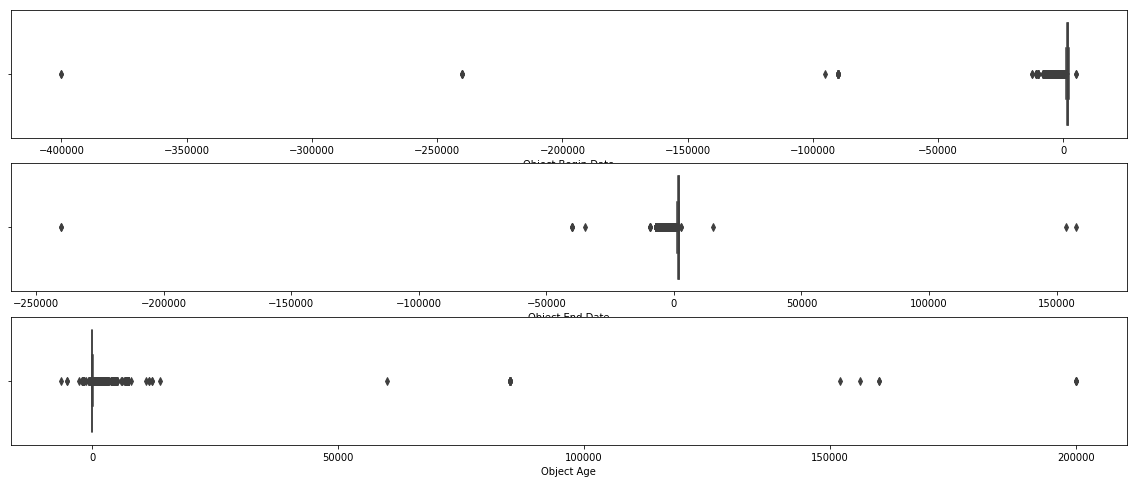

In [21]:
df['Object Age'] = df['Object End Date'] - df['Object Begin Date']

plt.figure(figsize=(20, 8))
plt.subplot(3,1,1)
sns.boxplot(x="Object Begin Date", data=df)
plt.subplot(3,1,2)
sns.boxplot(x='Object End Date', data=df)
plt.subplot(3,1,3)
sns.boxplot(x='Object Age', data=df)

## Checking 'big outliers' (description of them below)

In [22]:
#number of 'big outliers'
arr = (df[ (df['Object End Date'] > 2100) | (df['Object End Date']  < -25000) | (df['Object Begin Date'] > 2100) | (df['Object Begin Date']  < -50000)][['Object Name','Object Begin Date','Object End Date','Title', 'Culture', 'Period',
       'Dynasty']].values) 

print(len(arr))

30


### For better visualization of outliers I created new data frame without 'big outliers'

Those 'big outliers' are objects with 
 - begin date smaller than -25000 or bigger than 2100
 - end date smaller than -50000 or bigger than 2100

In a previous cell I counted that there is just 30 of such objects

In [23]:
df_wo_big_dates = (df[ (df['Object End Date'] < 2100) & (df['Object End Date']  > -25000) & (df['Object Begin Date'] < 2100) & (df['Object Begin Date']  > -50000)][['Object Name','Object Begin Date','Object End Date','Title', 'Culture', 'Period',
       'Dynasty']])

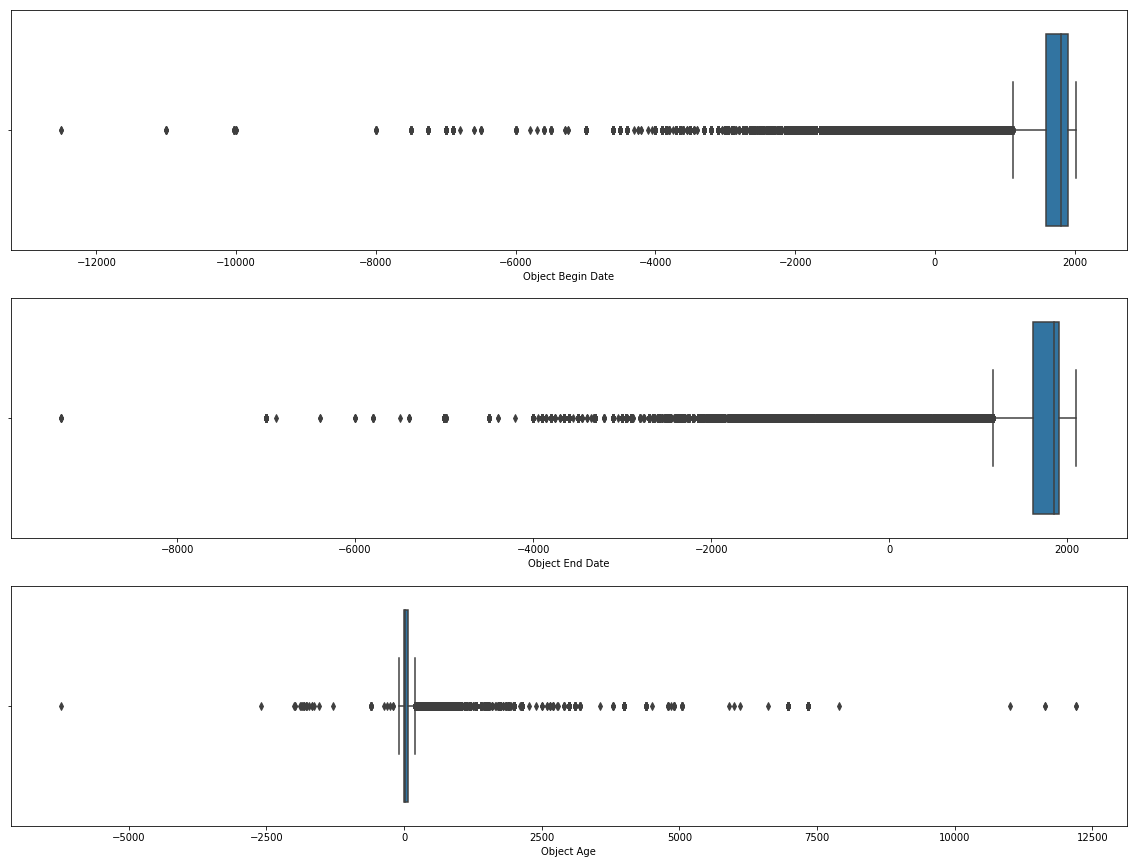

In [24]:
df_wo_big_dates['Object Age'] = df_wo_big_dates['Object End Date'] - df_wo_big_dates['Object Begin Date']

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
sns.boxplot(x="Object Begin Date", data=df_wo_big_dates)
plt.subplot(3,1,2)
sns.boxplot(x='Object End Date', data=df_wo_big_dates)
plt.subplot(3,1,3)
sns.boxplot(x='Object Age', data=df_wo_big_dates)

### Wrong values of age

It is good to add here that we can consider all values above current age are wrong values, but we don't know exactly what was the idea of somebody who created this set.
We can see that there are some objects with wrong values of begin and end date.
The age of object cannot be smaller than 0.
I will delete such records from my temporary set to better visualisation of outliers with age

In [25]:
print(len(df_wo_big_dates[df_wo_big_dates['Object Age'] < 0]))

197


Deleting records with age less then 0

In [26]:
df_wo_big_dates = df_wo_big_dates.drop(df_wo_big_dates[df_wo_big_dates['Object Age'] < 0].index)

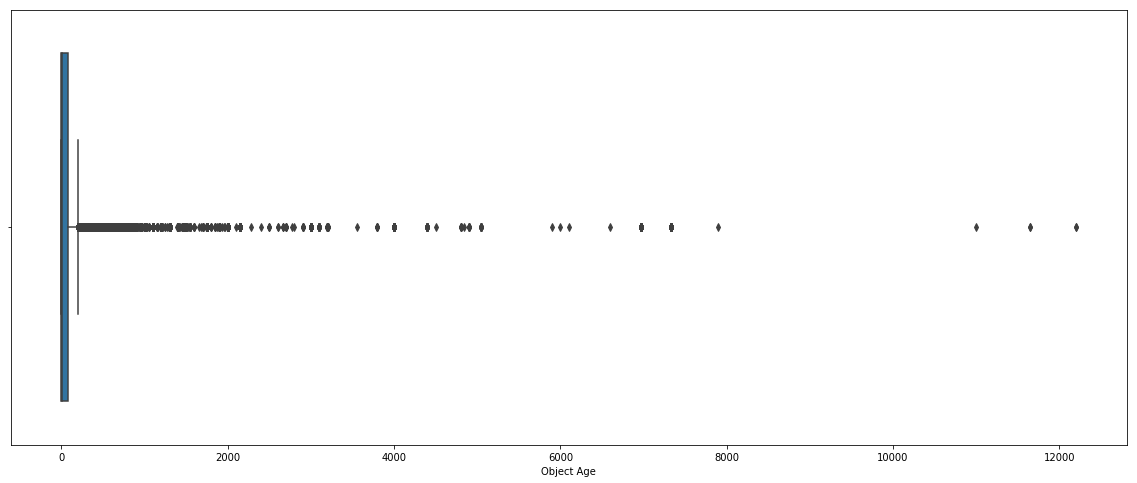

In [27]:
plt.figure(figsize=(20, 8))
plt.subplot(1,1,1)
sns.boxplot(x='Object Age', data=df_wo_big_dates)

##  - I decided not to delete any rows with 'outliers' from original data.
## - I just wanted to visualised it

## -----------------------------------------------------------------------------------------------------------------------------

## MIssing Data

I will store information about missing values of every column in Data Frame. I will use it for it my own function.

In [28]:
df_mis_val = pd.DataFrame(columns=['Column Name','Number of missing values','Fraction of missing values'])

def checkHowMuchMissingValues(df,column_name):
    global df_mis_val
    
    try:
        array = df[column_name].values
        count = 0
        for a in array:
            if type(a) == float:
                if math.isnan(a):
                    count+=1
        if count == 0:
            return
        
        length_df = len(df)
        fract = count/length_df * 100
        
        #A lot of columns have a lot of missing values
        #if fract > 30:
            #print("MORE THAN 30% of MISSING VALUES IN COLUMN: ", column_name.upper())
        
        fract = round(fract,4)
        fract_str = str(fract)+" %"
        
        tmp_str1 = "Number of missing values in column '" + column_name + "' = " + str(count)
        tmp_str2 = "Fraction of missing values in column '" + column_name + "' = " + fract_str
        
        #print(tmp_str1)
        #print(tmp_str2)
        #print()
        
        df_mis_val = df_mis_val.append({'Column Name':column_name,'Number of missing values':count,'Fraction of missing values':fract}, ignore_index = True)
        
    except Exception as a:
        print(a)

In [29]:
for column in df.columns.values :
    checkHowMuchMissingValues(df,column)

There is a lot of columns with a lot of missing values, so I will not care about them.

In [30]:
display(df_mis_val[df_mis_val['Fraction of missing values']>30])

Column Name Number of missing values  \
2                   Culture                   280203   
3                    Period                   399306   
4                   Dynasty                   449156   
5                     Reign                   461249   
6                 Portfolio                   450635   
7               Artist Role                   190916   
8             Artist Prefix                   375766   
9       Artist Display Name                   189697   
10       Artist Display Bio                   237184   
11            Artist Suffix                   461715   
12        Artist Alpha Sort                   189726   
13       Artist Nationality                   278733   
14        Artist Begin Date                   235163   
15          Artist End Date                   237844   
19                     City                   440371   
20                    State                   469654   
21                   County                   463990   
22                   Region                   440664   
23                Subregion                   450311   
24                   Locale                   456906   
25                    Locus                   465138   
26               Excavation                   456500   
27                    River                   470365   
29  Rights and Reproduction                   448171   

    Fraction of missing values  
2                      59.3069  
3                      84.5158  
4                      95.0669  
5                      97.6265  
6                      95.3800  
7                      40.4087  
8                      79.5334  
9                      40.1507  
10                     50.2016  
11                     97.7251  
12                     40.1568  
13                     58.9957  
14                     49.7738  
15                     50.3413  
19                     93.2075  
20                     99.4055  
21                     98.2066  
22                     93.2695  
23                     95.3114  
24                     96.7073  
25                     98.4496  
26                     96.6213  
27                     99.5559  
29                     94.8584

I will just care about this 5 columns with quite low number fraction of missing data.

In [31]:
display(df_mis_val[df_mis_val['Fraction of missing values']<30])

Column Name Number of missing values  Fraction of missing values
0      Object Name                     3994                      0.8454
1            Title                    31068                      6.5758
16          Medium                     7574                      1.6031
17      Dimensions                    60609                     12.8283
18     Credit Line                      721                      0.1526
28  Classification                    56433                     11.9444

For better analysis I will also check number of unique values in each of those columns

In [32]:
tmp_column_names = ['Object Name','Title','Medium','Dimensions','Credit Line','Classification']
nunique_df = pd.DataFrame(columns = ['Column Name','Number of unique values'])
for column_name in tmp_column_names:
    nunique_val = df[column_name].nunique()
    nunique_df = nunique_df.append({'Column Name':column_name,'Number of unique values':nunique_val}, ignore_index=True)


tmp_df = df_mis_val[df_mis_val['Fraction of missing values']<30].copy()
tmp_df.index = [i for i in range(len(tmp_df))]  

result_df = pd.concat([tmp_df, nunique_df],axis=1,join='inner')

result_df = result_df.loc[:,~result_df.columns.duplicated()]
    
display(result_df)

Column Name Number of missing values  Fraction of missing values  \
0     Object Name                     3994                      0.8454   
1           Title                    31068                      6.5758   
2          Medium                     7574                      1.6031   
3      Dimensions                    60609                     12.8283   
4     Credit Line                      721                      0.1526   
5  Classification                    56433                     11.9444   

  Number of unique values  
0                   27888  
1                  246256  
2                   64554  
3                  253824  
4                   38722  
5                    1214

In [33]:
getUniqueAndPrint(df,'Credit Line')


Bequest of John M. Crawford Jr., 1988

Gift of Mr. and Mrs. Peter H. B. Frelinghuysen, 1991

Harris Brisbane Dick Fund, 1927
"Matenadaran" Mesrop Mashtots Institute-Museum of Ancient Manuscripts, ms 6341
"Matenadaran" Mesrop Mashtots Institute-Museum of Ancient Manuscripts, ms 6665
"Matenadaran" Mesrop Mashtots Instutute-Museum of Ancient Manuscripts, ms 189
"Matenadaran" Mesrop Mashtots Instutute-Museum of Ancient Manuscripts, ms 1920
"Matenadaran" Mesrop Mashtots Instutute-Museum of Ancient Manuscripts, ms2804
04.3.280, .282: Rogers Fund, 1904; 23.58: Anonymous Gift, in memory of Cornelius Stevenson, 1923; 26.234.3: Gift of George D. Pratt, 1926
04.3.64, .65: Rogers Fund, 1904; 14.25.454: Gift of William H. Riggs, 1913
14.25.439: Gift of William H. Riggs, 1913; 42.50.38–.40: Gift of Stephen V. Grancsay, 1942
14.25.854: Gift of William H. Riggs, 1913; 21.42: Rogers Fund, 1921
1934 Art and Industry Exhibition Photograph Collection, Baker Library Historical Collections, Harvard Busines

Bequest of Marilyn Lovell Miller, 1993
Bequest of Marilyn Preston Graves, 1999
Bequest of Marilyn Preston Graves,1999
Bequest of Marion L. Ring, 1987
Bequest of Marion Weeber Welsh, 2000
Bequest of Marion Wenaca, 1977
Bequest of Marjorie Merriweather Post, 1973 (24.151.1-2); Hillwood Estate, Museum & Gardens, Washington, D.C.
Bequest of Marquise Raoul de Saint Cyr, 1988
Bequest of Martha A. Zalles, 1978
Bequest of Martha T. Fiske Collord, in memory of Josiah M. Fiske, 1908
Bequest of Martha T. Fiske Collord, in memory of her first husband, Josiah M. Fiske, 1908
Bequest of Mary A. Weissbuch, in memory of Yaro and Mary Zenishek, 1989
Bequest of Mary Addison Mitchell, 1974
Bequest of Mary Anna Palmer Draper, 1914
Bequest of Mary Anna Palmer Draper, 1915
Bequest of Mary B. Coggeshall, 1973
Bequest of Mary C. Beecher, 1922
Bequest of Mary Clark Thompson, 1923
Bequest of Mary Clark Thompson, 1924
Bequest of Mary Cushing Fosbugh, 1978
Bequest of Mary Cushing Fosburgh, 1978
Bequest of Mary Cus

Brooklyn Museum Costume Collection at The Metropolitan Museum of Art, Gift of the Brooklyn Museum, 2009; Gift of Joan Fontaine, 1964
Brooklyn Museum Costume Collection at The Metropolitan Museum of Art, Gift of the Brooklyn Museum, 2009; Gift of Joanna Bergvall, 1967
Brooklyn Museum Costume Collection at The Metropolitan Museum of Art, Gift of the Brooklyn Museum, 2009; Gift of Joanne Johannes Polster, 1996
Brooklyn Museum Costume Collection at The Metropolitan Museum of Art, Gift of the Brooklyn Museum, 2009; Gift of John C. Monks, 1966
Brooklyn Museum Costume Collection at The Metropolitan Museum of Art, Gift of the Brooklyn Museum, 2009; Gift of John Gordon, 1973
Brooklyn Museum Costume Collection at The Metropolitan Museum of Art, Gift of the Brooklyn Museum, 2009; Gift of John R. H. Blum, 1970
Brooklyn Museum Costume Collection at The Metropolitan Museum of Art, Gift of the Brooklyn Museum, 2009; Gift of John R. Hotson, 1946
Brooklyn Museum Costume Collection at The Metropolitan M

Collection of Mickey Cartin, courtesy of Daxer & Marschall, Munich
Collection of Mindell Dubansky
Collection of Mirsini Amidon
Collection of Monsieur and Madame Dominique Mégret, Paris
Collection of Mr. and Mr. Roger S. Wieck and Jean-François A. Vilain
Collection of Mr. and Mrs. Charles Diker (DAC513)

Collection of Mrs. Stuart Cary Welch, New Hampshire
Collection of Nick Cave
Collection of Norma B. Marin
Collection of Pamela Joyner
Collection of Paul Manganaro
Collection of Peggy and Richard M. Danziger
Collection of Philip H. Isles
Collection of Philip Taaffe, New York. ©Metropolitan Museum of Art.
Collection of Philip and Jennifer Maritz
Collection of Pitt and Barbara Hyde
Collection of Pushkar Sohoni, Philadelphia
Collection of Randi and Bob Fisher
Collection of Raymond and Priscilla Vickers
Collection of Richard Pohrt Jr.
Collection of Richard Sharp
Collection of Rick Hunting and Jolanda Hunting
Collection of Ricky Jay
Collection of Rina & Norman Indictor


Collection of Rina and

Gift of A. L. and H. L. Ferguson, 1923
Gift of A. M Tenney Associates, Inc. and Tennessee Eastman Corporation, 1950
Gift of A. M Tenney Associates, Inc. and Tennessee Eastman Corporation, 1950



Gift of A. Mahboubian, 1965
Gift of A. Marks-Rocke, 1980
Gift of A. Murray Young, 1920
Gift of A. Norris Kennard, 1979
Gift of A. Rabenou, 1930
Gift of A. Richard Benedek, 1977
Gift of A. S. Colgate, 1951
Gift of A. S. Colgate, 1952
Gift of A. S. Colgate, 1955
Gift of A. Sichel, 1879
Gift of A. Sichel, 1880
Gift of A. T. Gardner, 1965
Gift of A. Vecht, 1930
Gift of A. W. Bahr, 1916
Gift of A. W. Bahr, 1923
Gift of A. W. Bahr, 1947
Gift of A. W. Bahr, 1948
Gift of A. W. Bahr, 1953
Gift of A. W. Bahr, 1954
Gift of A. W. Bahr, 1958
Gift of A. W. Bahr, in memory of Dr. Arnold Genthe, 1950
Gift of A. W. Bahr, in memory of his wife, Helen Marion Bahr, 1952
Gift of A. W. Bahr, in memory of his wife, Helen Marion Bahr, 1954
Gift of A. W. Mininberg, in memory of Frances H. Wikler, 1990
Gift of A. Yakov

Gift of Brooke Alexander, 1970
Gift of Brooke Alexander, Inc., 1972
Gift of Brooke Alexander, Inc., 1977
Gift of Brooke Astor, 1994
Gift of Brooke Cadwallader, 1945
Gift of Brooke Shields, 2009
Gift of Brooke and Carolyn Alexander, 1980
Gift of Brooke and Carolyn Alexander, 1985
Gift of Brooks Adams & Lisa Liebmann, 1995
Gift of Brooks Adams and Lisa Liebmann, 1993
Gift of Brooks Adams and Lisa Liebmann, 1995
Gift of Brooks Adams and Lisa Liebmann, 1996
Gift of Brooks Adams, 1992
Gift of Brooks Adams, in memory of Paul M. Ettesvold, 1986
Gift of Brooks Brothers, 1962
Gift of Brooks Costume Company Co., 1949
Gift of Brooks-Van Horne Costume Co., 1968
Gift of Bruce A. Kirstein, in memory of Marc S. Kirstein, 1978
Gift of Bruce B. Grynbaum in memory of his parents Gertrude and Maurycy Grynbaum, 1991
Gift of Bruce B. Grynbaum, 1991
Gift of Bruce J. Bart, in honor of Harriet Bart, 2006
Gift of Bruce J. Bart, in honor of Mort and Natalie Levine, 2003
Gift of Bruce P. McNall, 1976
Gift of Bru

Gift of Dorothy C. Livingston, in loving memory of Robert R. Livingston, 1986
Gift of Dorothy Cox, 1968
Gift of Dorothy Dehner, 1986
Gift of Dorothy Dehner, in memory of Ferdinand Mann, 1992
Gift of Dorothy Elowitch, 1991
Gift of Dorothy F. Rolph, in memory of her sister, Helen L. Beloussoff, 1961
Gift of Dorothy Frances Rowell, 1985
Gift of Dorothy Hummel Crispo and Paul F. Crispo, 1961
Gift of Dorothy Kearton Lhamon, 1979
Gift of Dorothy Lee Ward, 1958
Gift of Dorothy Levitt Beskind, 1974
Gift of Dorothy Lichtenstein, in memory of Roy Lichtenstein, 2003
Gift of Dorothy Lieberman, M.D., 1977
Gift of Dorothy Liebes Design Inc., 1973
Gift of Dorothy Liebes Design, Inc., 1973
Gift of Dorothy M. Fordyce, 1983
Gift of Dorothy N. Lewis, 1961
Gift of Dorothy Norman, 1974
Gift of Dorothy Norman, 1998
Gift of Dorothy Noyes Arms, 1954
Gift of Dorothy O. and Diana Schubart, in memory of William Howard Schubart, 1953
Gift of Dorothy R. Fraser, "in Memory of my Mother," D.J. Prentice Fraser, 1976


Gift of Ethel Brody, 1992
Gift of Ethel Frankau, 1950
Gift of Ethel Frankau, 1958
Gift of Ethel Linden Reiner, 1954
Gift of Ethel Lyman Mackey and Ruth Watrous Hellum, 1960
Gift of Ethel Lyman Mackey in memory of Mary Hopkins Emerson, 1977
Gift of Ethel Lyman Mackey, in memory of Mary Hopkins Emerson, 1977
Gift of Ethel M. Yocum, 1964
Gift of Ethel McCullough Scott, John G. McCullough, and Edith McCullough Irons, 1971
Gift of Ethel McCullough Scott, John G. McCullough, and Edith McCullough Irons, 1972
Gift of Ethel Redner Scull, 1978
Gift of Ethel W. Royer, 1993
Gift of Ethel Watts Grant, 1939
Gift of Etheleen and Allen Staley, 2013
Gift of Ethelinda and Lowell Innes, 1980
Gift of Ethelwyn Bradish, 1957
Gift of Ethelyn McKinney, in memory of her brother, Glenn Ford McKinney, 1943
Gift of Etienne Aigner, 1977
Gift of Etienne Lawrence Sturhahn, 1975
Gift of Etsuko O. Morris and John H. Morris Jr., in memory of Dr. Frederick M. Pedersen, 2001
Gift of Etsuko O. Morris and John H. Morris Jr

Gift of Gitelson Libraries Foundation, 1962
Gift of Gitter-Yelen Collection, 2005
Gift of Gitter-Yelen Foundation, in honor of John T. Carpenter, 2011
Gift of Gitter-Yelen Foundation, in honor of Maxwell K. Hearn, 2011
Gift of Giulia P. Morosini, in memory of her father, Giovanni P. Morosini, 1923
Gift of Giuseppe Gazzoni-Frascara, in memory of Idarica Gazzoni-Frascara, 2001
Gift of Givenchy Haute Couture, 1999
Gift of Glady Whitfield Solomon, 1977
Gift of Gladys Janecek, 2002
Gift of Gladys Murray Hall, 1980
Gift of Glendale Linen Company, 1942
Gift of Glenn M. Shaw, 1974
Gift of Glennis M. Stout, 1988

Gift of Gloria Barggiotti Etting, 1980
Gift of Gloria F. Ross, 1996
Gift of Gloria Gallucci and Julien Stock, 2012
Gift of Gloria Granz Gonick, 2011
Gift of Gloria Manney, 2006
Gift of Gloria Naftali, 2016
Gift of Gloria Silver, 1984
Gift of Gloria Stuart, 2002
Gift of Gloria Title, 1997
Gift of Gloria Zicht, 1992
Gift of Gloria and Leonard Luria, 1985
Gift of Gloria and Richard Manney

Gift of Jane Coper, 1993
Gift of Jane Costello Goldberg, from the Collection of Arnold I. Goldberg, 1980
Gift of Jane Costello Goldberg, from the Collection of Arnold I. Goldberg, 1981
Gift of Jane D. Kaufmann 1993
Gift of Jane D. Kaufmann, 1993
Gift of Jane D. Kaufmann, 1997
Gift of Jane D. Miller, 1986
Gift of Jane Darlington Irwin, 1979
Gift of Jane Darlington Irwin, 1981
Gift of Jane Dee Clarke, 1999
Gift of Jane Dee Clarke, 2004
Gift of Jane Dickson, 1992
Gift of Jane Dotson Ciabattari, 1996
Gift of Jane Dow Bromberg, 1996
Gift of Jane Durando Miller, 1977
Gift of Jane Durando Miller, 1978
Gift of Jane Durando Miller, 1980
Gift of Jane Elizabeth Decker, 1940
Gift of Jane Evans Sargeant, 1986
Gift of Jane Grant, 1945
Gift of Jane Greenwood, 1983
Gift of Jane H. Dehn, 2003
Gift of Jane H. Lee, 1986
Gift of Jane Hardesty Poole, 1995
Gift of Jane Hardesty Poole, 2014
Gift of Jane Holzer, 1974
Gift of Jane Holzer, 1977
Gift of Jane Holzer, 1980
Gift of Jane Holzer, 1983
Gift of Jane Ho

Gift of Laurent Oppenheim, Jr., 1964, in memory of Laurent and Amy Oppenheim
Gift of Laurent Oppenheim, Jr., 1977
Gift of Laurent Oppenheim, Jr., in memory of Laurent and Amy Oppenheim, 1964
Gift of Laurie Vance Johnson, 1981
Gift of Lauritz Melchior, 1951 & 1952
Gift of Lawrence B. Romaine
Gift of Lawrence B. Romaine 1951
Gift of Lawrence B. Romaine 1960
Gift of Lawrence B. Romaine, 1947
Gift of Lawrence B. Romaine, 1951
Gift of Lawrence B. Romaine, 1953
Gift of Lawrence B. Romaine, 1957
Gift of Lawrence B. Romaine, 1960
Gift of Lawrence B. Romaine, 1961
Gift of Lawrence B. Romaine, 1962
Gift of Lawrence B. Romaine, 1963
Gift of Lawrence B. Romaine, l960
Gift of Lawrence B. Romaine,1950
Gift of Lawrence B. Romanie 1960
Gift of Lawrence Creshkoff, 1990
Gift of Lawrence Crombez, 1988
Gift of Lawrence D. and Sybil Hite, 2003
Gift of Lawrence Fleischman, 1974
Gift of Lawrence Grant White, 1934
Gift of Lawrence Gussman, 1979
Gift of Lawrence Gussman, 1981
Gift of Lawrence J. Gang, 1984
Gif

Gift of Michael and Douglas Heller, 1980
Gift of Michael and Jacqueline Franses, 1993
Gift of Michael and Jane Wilson, 2014
Gift of Michael de Laszlo, 1978
Gift of Michal and Ilse McClure, in honor of Christopher Parkening, classical guitarist, and David Thomas, recording producer, 2010 

 




Gift of Michal and R.E. Lewis, 1984
Gift of Michal, Jan and R. E. Lewis, 1986
Gift of Michel Abemayor, 1951
Gift of Michel Abraham, 1978
Gift of Michel Benisovitch, 1930
Gift of Michel Benisovitch, 1949
Gift of Michel Benisovitch, 1951
Gift of Michel E. Abemayor, 1971
Gift of Michel Fortin, 2011
Gift of Michel N. Benisovitch
Gift of Michel N. Benisovitch, 1950
Gift of Michel Soskine, 1987
Gift of Michel de Bry, 1971
Gift of Michel-Ange Bernard, 1959
Gift of Michele Beiny Harkins, 2015
Gift of Michele Oka Doner, 2001
Gift of Michele Wiener Caplan, 2016
Gift of Michelle C. Bigelow, 1994
Gift of Miguel Adrover, 2005
Gift of Miguel Adrover, 2010
Gift of Mihail Chemiakin, 1981
Gift of Miki Denhof, 19

Gift of Mr. Christian Lacroix for Christian Lacroix SNC, 1998
Gift of Mr. Ciro Cacchione, 1990
Gift of Mr. Claggett WIlson, 1941
Gift of Mr. Claggett Wilson, 1938
Gift of Mr. Claggett Wilson, 1941
Gift of Mr. Claggett Wilson, 1942
Gift of Mr. Claggett Wilson, 1946
Gift of Mr. Collin Clements, 1947
Gift of Mr. Cornelius Vanderbilt and Mrs. Robert L. Stevens, 1953
Gift of Mr. Daniel M. Stranahan, 1964
Gift of Mr. David Evins, 1968
Gift of Mr. David Evins, 1975
Gift of Mr. David Lang, 1956
Gift of Mr. David Toser, 1974
Gift of Mr. Dudley Hilborn, 1965
Gift of Mr. E. A. Maynard, 1949
Gift of Mr. E. L. Waid, 1955
Gift of Mr. Ed Villiotti, 1974
Gift of Mr. Edgar Tallman, 1954
Gift of Mr. Edward A. Eames, 1976
Gift of Mr. Edward D. Adams, 1909
Gift of Mr. Edward Larocque Tinker, 1952
Gift of Mr. Edward Leight, 1974
Gift of Mr. Edward Steese, 1957
Gift of Mr. Edward Steese, 1962
Gift of Mr. Edward Steese, 1964
Gift of Mr. Edwin H. Foreman, 1949
Gift of Mr. Edwin J. Gutman, 1944
Gift of Mr. Edw

Gift of Mrs. Alfred Joltin, in memory of Major Henry Gordon Opdycke, 1971
Gift of Mrs. Alfred Kramer, 1937
Gift of Mrs. Alfred Marrow, 1974
Gift of Mrs. Alfred Mueller, 1956
Gift of Mrs. Alfred Poor, 1958
Gift of Mrs. Alfred Rheinstein, 1950
Gift of Mrs. Alfred Schermerhorn, 1946
Gift of Mrs. Alfred Schermerhorn, 1946, in memory of Mrs. Allen Schermerhorn Auchmuty
Gift of Mrs. Alfred Schermerhorn, 1946, in memory of Mrs. John Gerard Coster
Gift of Mrs. Alfred Schermerhorn, in memory of Mrs. Ellen Schermerhorn Auchmuty, 1946
Gift of Mrs. Alfred Schermerhorn, in memory of Mrs. John Gerard Coster, 1946
Gift of Mrs. Alfred Slade Mills, 1983
Gift of Mrs. Alfred Sonder, 1962
Gift of Mrs. Algemon Sidney Sullivan, 1919
Gift of Mrs. Algernon S. Sullivan, 1919
Gift of Mrs. Algernon Sullivan, 1919
Gift of Mrs. Alice Baker Furst, 1942
Gift of Mrs. Alice Baker, 1941
Gift of Mrs. Alice C. Taft, Mrs. Marianna F. Taft, Miss Hope Smith, Mrs. Helen Bradley Head, and Brockholst M. Smith, 1945
Gift of Mrs

Gift of Mrs. Harry Horton Benkard, 1942
Gift of Mrs. Harry L. Toplitt Jr., in memory of Harry L. Toplitt, Jr., 1984
Gift of Mrs. Harry Lampel, 1955
Gift of Mrs. Harry Lissauer in memory of her mother, Huldah Klauber, 1981
Gift of Mrs. Harry Paine Whitney, 1925
Gift of Mrs. Harry Payne Bingham, 1958
Gift of Mrs. Harry Payne Bingham, 1959
Gift of Mrs. Harry Payne Bingham, 1962
Gift of Mrs. Harry Payne Bingham, 1974
Gift of Mrs. Harry Payne Bingham,1974
Gift of Mrs. Harry Payne Whitney, 1921
Gift of Mrs. Harry Payne Whitney, 1926
Gift of Mrs. Harry R. Radin, 1937
Gift of Mrs. Harry Rodwin, 1952
Gift of Mrs. Harry Rodwin, 1957
Gift of Mrs. Harry Sinclair, 1952
Gift of Mrs. Harry Sproull Casler in memory of Estelle Campbell, 1994
Gift of Mrs. Harry T. Peters, 1940
Gift of Mrs. Harry T. Peters, 1950
Gift of Mrs. Harry T. Peters, 1956
Gift of Mrs. Harry T. Petters, 1940
Gift of Mrs. Harry Townsend, 1942
Gift of Mrs. Hartley A. Maconochie, 1941
Gift of Mrs. Harvey Brewer, 1973
Gift of Mrs. Har

Gift of Mrs. Russell Sage and various other donors, by exchange, 1969
Gift of Mrs. Russell Sage, 1908
Gift of Mrs. Russell Sage, 1909
Gift of Mrs. Russell Sage, 1910
Gift of Mrs. Russell Sage, 1911
Gift of Mrs. Russell Sage, 1913
Gift of Mrs. Russell Sage, 1914
Gift of Mrs. Russell Sage, 1916
Gift of Mrs. Russell Sage, 1917
Gift of Mrs. Russell Sage, Bequest of Ethel Yocum, Bequest of Charlotte E. Hoadley, and Rogers Fund, by exchange, 1971
Gift of Mrs. Russell Scott, in memory of her grandfather, Judge Henry Hilton, 1932
Gift of Mrs. Russell W. Davenport, 1962
Gift of Mrs. Russell W. Davenport, 1963
Gift of Mrs. Russell Y. Smith, 1964
Gift of Mrs. Ruth Backer, 1967
Gift of Mrs. Ruth Blumka, 1976
Gift of Mrs. Ruth Blumka, 1980
Gift of Mrs. Ruth Blumka, 1989
Gift of Mrs. Ruth Blumka, in Memory of Leopold Blumka, 1974
Gift of Mrs. Ruth Blumka, in honor of Timothy Husband, 1989
Gift of Mrs. Ruth Blumka, in memory of  Leopold Blumka, 1974
Gift of Mrs. Ruth Blumka, in memory of Leopold Blum

Gift of Prince Albrecht Radziwill, by exchange, 1928
Gift of Prince and Princess Alexander Romanoff, 1996
Gift of Princess Brancaccio, 1893
Gift of Princess Doria Di Centola, 1981
Gift of Princess Dorothy Guidice Caracciolo, 1946
Gift of Princess Galitzine Archives, 2011
Gift of Princess Maria Niscemi Romanoff, 1996
Gift of Princesse Serge Wolkonsky, 1954
Gift of Princeton Process, Inc. and The Brothers Christie Fur Corp., 1975
Gift of Princeton University Library, 1978
Gift of Priscilla A. B. Henderson, in memory of her grandfather, Russell Sturgis, a founder of The Metropolitan Museum of Art, 1950
Gift of Priscilla A. B. Henderson, in memory of her grandfather, Russell Sturgis, a founder of the Metropolitan Museum of Art, 1950
Gift of Priscilla Brandt, 1995
Gift of Priscilla Cunningham, 1999
Gift of Priscilla T. Grace, 1978
Gift of Priscilla de F. Williams, 2004
Gift of Priscilla de Forest Williams, 1992
Gift of Priscilla deForest Williams, in memory of Jacob Bean, 1995
Gift of Priva

Gift of Stephen D. Weinroth, 1987
Gift of Stephen Dweck Jewelry, 1989
Gift of Stephen Gan, 1996
Gift of Stephen Gan, 2002
Gift of Stephen Gray, 1984
Gift of Stephen Gray, 1985
Gift of Stephen H. Bernstein, in honor of Daniel H. Cass, 2013
Gift of Stephen Higgons, 1961
Gift of Stephen J. Balsam, M. D. and family, 1988
Gift of Stephen K. Scher, 2009
Gift of Stephen L. Lindsey, 1999
Gift of Stephen L. Singer, 1981
Gift of Stephen Matchak, 1924
Gift of Stephen Mazoh & Co. Inc. 1985
Gift of Stephen Mazoh & Co., Inc., 2005
Gift of Stephen Mazoh and Purchase, Bequest of Gioconda King, by exchange, 2008
Gift of Stephen Mazoh, 1986
Gift of Stephen Mazoh, 1997
Gift of Stephen Mazoh, 2003
Gift of Stephen Mazoh, 2004
Gift of Stephen Perlow, 1981
Gift of Stephen Pistner, 1985
Gift of Stephen R. Tobias, 2013
Gift of Stephen Romano Gallery in honor of Kelly Baum, 2018
Gift of Stephen Romano Gallery in recognition of Kelly Baum, 2017
Gift of Stephen Rubin, 1975
Gift of Stephen Shore, 1975
Gift of Step

Gift of fotomann Inc, 1989
Gift of fotomann inc., 1989
Gift of friends of Berry B. Tracy, 1980
Gift of friends of John F. Carlson, 1947
Gift of friends of Louis Loeb, 1909
Gift of friends of Mrs. E. M. Scott, 1909
Gift of friends of the artist, 1912
Gift of friends of the artist, by subscription, 1912
Gift of friends of the artist, through August F. Jaccaci, 1908
Gift of heirs of Emily Kearny Rodgers Cowenhoven, 1970
Gift of le Duc de Loubat, 1903
Gift of lev Tsitrin, 2000
Gift of m.r.s, 2003
Gift of members of the Blumka family, in memory of Eric Mitchell, 1986
Gift of members of the family of Adaline Havemeyer Frelinghuysen, 1992
Gift of mrs. Leslie Snyder, 1945
Gift of several friends, 1904
Gift of several gentlemen, 1906
Gift of students and admirers of the artist, 1927
Gift of the  designer, 1984
Gift of the Aboutaam Family, 1995
Gift of the Academy for Educational Development, 1982
Gift of the Actors of the City of New York, 1885
Gift of the Adolph and Esther Gottlieb Foundation,

Jagdish and Kamla Mittal Museum of Indian Art, Hyderabad
Jagdish and Kamla Mittal Museum of Indian Art, Hyderabad

Jamee and Marshall Field
James Hazen Hyde Estate, 1959
James J. Ross, New York
James W. and Frances McGlothlin
Jan Mitchell and Sons Collection, Gift of Jan Mitchell, 1991
Jan Mitchell and Sons Collection, Gift of Jan Mitchell, 1992
Jan Mitchell and Sons Collection, Gift of Jan Mitchell, 1995
Jan Mitchell and Sons Collection, Gift of Jan Mitchell, 1996
Jan Mitchell and Sons Collection, Gift of Jan Mitchell, 1999
Jan Mitchell and Sons Collection, Gift of Jan Mitchell, 2002
Jane E. Andrews Fund, in Memory of William Loring Andrews, transferred from the Library, 1942
Jane E. Andrews Fund, in memory of William Loring Andrews, 1933, Transferred from the Library (1991.1073.188)
Jane E. Andrews Fund, in memory of William Loring Andrews, 1933, Transferred from the Library (1991.1073.34)
Jane E. Andrews Fund, in memory of William Loring Andrews, 1933, transferred from the Library (

Museum Accesion, 1962
Museum Accession
Museum Accession 1943 (Alfred H. Barr, Jr.)?
Museum Accession 1951
Museum Accession 1960
Museum Accession 1968
Museum Accession, 1918
Museum Accession, 1920
Museum Accession, 1921
Museum Accession, 1926
Museum Accession, 1928
Museum Accession, 1929
Museum Accession, 1930
Museum Accession, 1931
Museum Accession, 1933
Museum Accession, 1938
Museum Accession, 1939
Museum Accession, 1941
Museum Accession, 1942
Museum Accession, 1943
Museum Accession, 1944
Museum Accession, 1945
Museum Accession, 1946
Museum Accession, 1947
Museum Accession, 1948
Museum Accession, 1949
Museum Accession, 1950
Museum Accession, 1952
Museum Accession, 1952
[source unknown]
Museum Accession, 1953
Museum Accession, 1954
Museum Accession, 1955
Museum Accession, 1956
Museum Accession, 1957
Museum Accession, 1958
Museum Accession, 1959
Museum Accession, 1960
Museum Accession, 1961
Museum Accession, 1962
Museum Accession, 1963
Museum Accession, 1964
Museum Accession, 1965
Museu

Purchase, Anonymous Gift, 1992
Purchase, Anonymous Gift, 1993
Purchase, Anonymous Gift, 1994
Purchase, Anonymous Gift, 1995
Purchase, Anonymous Gift, 1995

Purchase, Anonymous Gift, 1996
Purchase, Anonymous Gift, 1997
Purchase, Anonymous Gift, 1998
Purchase, Anonymous Gift, 1999
Purchase, Anonymous Gift, 2000
Purchase, Anonymous Gift, 2001
Purchase, Anonymous Gift, 2002
Purchase, Anonymous Gift, 2007
Purchase, Anonymous Gift, 2008
Purchase, Anonymous Gift, 2009
Purchase, Anonymous Gift, 2011
Purchase, Anonymous Gift, 2013
Purchase, Anonymous Gift, 2014
Purchase, Anonymous Gift, 2015

Purchase, Anonymous Gift, 2017
Purchase, Anonymous Gift, 2018
Purchase, Anonymous Gift, Cynthia Hazen Polsky Gift, Virginia G. LeCount Bequest, in memory of The LeCount Family, 2007 Benefit Fund, Louis V. Bell, Harris Brisbane Dick, Fletcher, and Rogers Funds and Joseph Pulitzer Bequest, and Gift of Dr. Mortimer D. Sackler, Theresa Sackler and Family,  2008

Purchase, Anonymous Gift, Friends of the
America

Purchase, Friends of the American Wing, 2017
Purchase, Friends of the American Wing, Emily C. Chadbourne, by exchange, The Elisha Whittelsey Collection, The Elisha Whittelsey Fund, Morrison H. Heckscher, and Amelia Peck, 2018
Purchase, Friends of the American Wing, by exchange, 2002
Purchase, Friends of the American Wing, by exchange, and Robert and Bobbie Falk Philanthropic Fund Gift, 2002
Purchase, Friends of the Benaki Museum Gift and Rogers Fund, 1996
Purchase, Friends of the Costume Institute Gifts, 2008
Purchase, Friends of the Costume Institute Gifts, 2010
Purchase, Friends of the Costume Institute Gifts, 2013
Purchase, Friends of the Costume Institute Gifts, 2016
Purchase, Friends of the Department Gift and matching funds from the National Endowment for the Arts, 1978
Purchase, Friends of the Department Gifts and Matching Funds from The National Endowment for the Arts, 1978
Purchase, Friends of the Department Gifts and matching Funds from the National Endowment for the Arts, 19

Purchase, James A. and Maria R. Warth Gift, in memory of Anne and Peter Warth, 1999
Purchase, James C. Meade Gift, 2012
Purchase, James C. Meade Gift, 2015
Purchase, James D. Krugman Gift, 2014
Purchase, James D. Krugman and Connie Simmons Krugman Gift, 2016
Purchase, James David Draper Gift, in memory of Robert Isaacson, 2001
Purchase, James J. Ross Gift, 2003
Purchase, James J. Ross Gift, Funds from various donors, and Ross Family Fund Gift, 2013
Purchase, James J. Ross, William B. Goldstein, Holly and David Ross, and James J. and Gladys W. Strain Gifts, 2013
Purchase, James N. Rosenberg Fund
Purchase, James N. Spear Gift, 1981
Purchase, James N. Spear Gift, 1984
Purchase, James R. Houghton Gift, 1990
Purchase, James Rogers Fund, 1921
Purchase, James and Diane Burke Gift,  in honor of Dr. Marilyn Jenkins-Madina, 2016
Purchase, James and Diane Burke Gift, in honor of Dr. Marilyn Jenkins-Madina, 2007
Purchase, James and Diane Burke Gift, in honor of Dr. Marilyn Jenkins-Madina, 2010
Pur

Purchase, Michael Ward and Friends of Inanna Gifts, 2002
Purchase, Michael and Tamara Root Gift, 2016
Purchase, Michel David-Weill Gift and 2006 Benefit Fund, 2007
Purchase, Michel David-Weill Gift, 1990
Purchase, Michel David-Weill Gift, 1991
Purchase, Michel David-Weill Gift, The Cloisters Collection, and Mme. Robert Gras Gift, in memory of Dr. Robert Gras, 2002
Purchase, Mildred S. Hilson Bequest, in honor of William S. Lieberman, 1996
Purchase, Miles J. Lourie Gift, 1988
Purchase, Millia Davenport and Zipporah Fleisher Fund, Irene Lewisohn Trust Gift, 2001
Purchase, Miriam Goldfine Gift, 2011
Purchase, Miriam and Ira D. Wallach Foundation Gift, 2010
Purchase, Miriam and Ira D. Wallach Foundation and Anonymous Gifts, 2013

Purchase, Miriam and Ira D. Wallach Philanthropic Fund Gift, 1991
Purchase, Miriam and Ira D. Wallach Philanthropic Fund Gift, 1993
Purchase, Miyeko Murase Gift, 2005
Purchase, Mobil Foundation Inc. Gift, 1980
Purchase, Mobil Foundation Inc. Gift; Sheikh Nasser Sa

Purchase, The Chace Foundation Inc. and Edgar Kaufmann Jr. Gifts, 1976
Purchase, The Charles B. and Irene B. Jacobs Foundation Gift, in honor of Joseph H. Hazen, 1986
Purchase, The Charles B. and Irene B. Jacobs Foundation Gift, in honor of Joseph H. Hazen; The Joseph G. Mayer Foundation Inc., Luisa Kriesberg and Leonard C. Yaseen Gifts, 1988
Purchase, The Charles B. and Irene B. Jacobs Foundation Gift, in honor of Joseph Hazen, 1986
Purchase, The Charles B. and Irene B. Jacobs Foundation Gift, in honor of Joseph Hazen, and The Warner Communication, W. N. Banks Foundation, The Eugene and Estelle Ferkauf Foundation and H. S. Bloch Philanthropic Fund Gifts, 1987
Purchase, The Charles E. Sampson Memorial Fund and Friends of European Sculpture and Decorative Arts Gifts, 2011
Purchase, The Charles E. Sampson Memorial Fund and Gift of Irwin Untermyer, by exchange, 1986
Purchase, The Charles E. Sampson Memorial Fund and Gift of J. Pierpont Morgan, by exchange, 1982
Purchase, The Charles E. Sa

Rogers Fund. 1936
Rogers Funds, 1928
Rogers and Director's Discretionary Fund, 1987
Rogers and Director's Discretionary Funds, 1978
Rogers and Edith Perry Chapman Funds, 1980
Rogers and Edith Perry Chapman Funds, 2000
Rogers and Fletcher Funds, 1973
Rogers and Gwynne Andrews Funds, 1935
Rogers and Ludlow Bull Funds, 1985
Rogers and Pfeiffer Funds, 1982
Rogers and Seymour Funds, 1992
Rogers and Seymour Funds, 2000
Rogers fund, 1907
Rogers fund, 1908
Rogers fund, 1917
Rogers fund, 1953
Rogers fund, by exchange
Rogers, Harris Brisbane Dick, and The Elisha Whittelsey Funds, 1961
Rogers, Harris Brisbane Dick, and The Elisha Whittelsey Funds, by exchange,1969
Rogers, Harris Brisbane Dick, and The Elisha Whittelsey Funds; and Gift of John Sise, by exchange, 1958
Rogers, Louis V. Bell and Fletcher Funds, 1982
Rogesr Fund, 1908
Roma, Musei Capitolini, Pinacoteca Capitolina
Rondel (14.25.1661b): Gift of William H. Riggs, 1913; sallet, backplate, breastplate (29.150.5a, .70, .80): Bashford Dean M

The Michael C. Rockefeller Memorial Collection, Gift of the IBM Corporation, 1966
The Michael C. Rockefeller Memorial Collection, Gift of the Matthew T. Mellon Foundation, 1960
The Michael C. Rockefeller Memorial Collection, Gift of the William W. Brill Foundation, 1962
The Michael C. Rockefeller Memorial Collection, Gift of the William W. Brill Foundation, 1964
The Michael C. Rockefeller Memorial Collection, Gift of the Wunderman Foundation, 1966
The Michael C. Rockefeller Memorial Collection, Purchase, Anonymous Gift and Nelson A. Rockefeller Gift, 1965
The Michael C. Rockefeller Memorial Collection, Purchase, Anonymous Gift, 1963
The Michael C. Rockefeller Memorial Collection, Purchase, Anonymous Gift, 1966
The Michael C. Rockefeller Memorial Collection, Purchase, Anonymous Gift, Nelson A. Rockefeller Gift and Mrs. Gertrud A. Mellon Gift, 1963
The Michael C. Rockefeller Memorial Collection, Purchase, Gift in  memory of Robert Goldwater from his Friends and Students at the Institute 

I need to store information about on which index there is missing value in 'Credit Line'

In [34]:
def countMissingValuesAndSaveIndexesOfThem(df,column_name):
    array = df[column_name].values

    indexes = []
    i=0

    for a in array:
        if type(a)==float:
            if math.isnan(a):
                indexes.append(i)
        i+=1

    print(len(indexes))

In [35]:
indexes = countMissingValuesAndSaveIndexesOfThem(df,'Credit Line') 

721


Before starting an algorithm I want to save old values. When algorithm will finish proceeding then I will save new values.

In [36]:
df_old_and_new_credit_line = pd.DataFrame(columns=['Old Credit Line','New Credit Line'])
df_old_and_new_credit_line['Old Credit Line'] = df['Credit Line']

## Algorithm to impute missing values.
- I will impute missing values for 'Credit Line' based on such values from rows which have the same values in such columns:
    'Department', 'Geography Type' and 'Country'
- I run this algorithm just once because it not optimalized and slow, but I managed final result.
- After this algorithm there is just 4 missing values insted of 721 so we can not care about them
- I have chosen those columns to compare because there are no missing values in them and it can be possible that objects with the same department, geography type and country can have also the same credit line

## Do not run this algorithm !!! It is just prove of what I have done to impute missing values
## Data which I got is stored in csv file and insted of running this algorithm I load it from the file

In [59]:
c = 0 #just to see progress of algorithm

#we need to set values for all missing values in 'Credit Line'
for i in indexes:
    co = 0 #just to see progress of algorithm
    c+=1
    if c%25 == 0:
        print("c = ",c)
    
    #we need to find records which have the same Department , Geography Type and Country as out record with nan value
    department_tofind = df.at[i,'Department']
    geo_type_tofind = df.at[i,'Geography Type']
    country_tofind = df.at[i,'Country']
    
    for j in range(len(df)):
        co+=1
        if co%50000 == 0:
            print("\tco = ",co)
        
        if (j==i) | (str(df.at[j,'Credit Line']) == 'nan'):
            continue
            
        department_tmp = df.at[j,'Department']
        geo_type_tmp = df.at[j,'Geography Type']
        country_tmp = df.at[j,'Country']
        
        if (department_tofind == department_tmp) & (geo_type_tofind == geo_type_tmp) & (country_tofind == country_tmp):
            df.at[i,'Credit Line'] = df.at[j,'Credit Line']
            break
            
#store new values in data frame and then save whole data frame into csv file not to proceed this algorithm once again
df_old_and_new_credit_line['New Credit Line'] = df['Credit Line']
df_old_and_new_credit_line.to_csv('Old_And_New_Credit_Line', sep='|', encoding='utf-8')

c =  25
c =  50
c =  75
c =  100
c =  125
c =  150
	co =  50000
	co =  100000
	co =  150000
	co =  200000
	co =  250000
	co =  300000
	co =  350000
	co =  400000
	co =  450000
	co =  500000
	co =  550000
	co =  600000
	co =  650000
	co =  700000
	co =  750000
	co =  800000
c =  175
	co =  850000
	co =  900000
c =  200
	co =  950000
	co =  1000000
	co =  1050000
	co =  1100000
	co =  1150000
	co =  1200000
	co =  1250000
	co =  1300000
	co =  1350000
	co =  1400000
	co =  1450000
	co =  1500000
	co =  1550000
	co =  1600000
	co =  1650000
	co =  1700000
	co =  1750000
	co =  1800000
	co =  1850000
	co =  1900000
	co =  1950000
	co =  2000000
	co =  2050000
	co =  2100000
	co =  2150000
	co =  2200000
	co =  2250000
	co =  2300000
	co =  2350000
	co =  2400000
	co =  2450000
	co =  2500000
	co =  2550000
	co =  2600000
	co =  2650000
	co =  2700000
c =  225
	co =  2750000
	co =  2800000
	co =  2850000
	co =  2900000
	co =  2950000
	co =  3000000
	co =  3050000
	co =  3100000
	co =  31500

	co =  26000000
c =  350
	co =  26050000
	co =  26100000
	co =  26150000
	co =  26200000
	co =  26250000
	co =  26300000
	co =  26350000
	co =  26400000
	co =  26450000
	co =  26500000
	co =  26550000
	co =  26600000
	co =  26650000
	co =  26700000
	co =  26750000
	co =  26800000
	co =  26850000
	co =  26900000
	co =  26950000
	co =  27000000
	co =  27050000
	co =  27100000
	co =  27150000
	co =  27200000
	co =  27250000
	co =  27300000
	co =  27350000
	co =  27400000
	co =  27450000
	co =  27500000
	co =  27550000
	co =  27600000
	co =  27650000
	co =  27700000
	co =  27750000
	co =  27800000
	co =  27850000
	co =  27900000
	co =  27950000
	co =  28000000
	co =  28050000
	co =  28100000
	co =  28150000
	co =  28200000
	co =  28250000
	co =  28300000
	co =  28350000
	co =  28400000
	co =  28450000
	co =  28500000
	co =  28550000
	co =  28600000
	co =  28650000
	co =  28700000
	co =  28750000
	co =  28800000
	co =  28850000
c =  375
	co =  28900000
	co =  28950000
	co =  29000000
	co = 

	co =  51450000
	co =  51500000
	co =  51550000
	co =  51600000
	co =  51650000
	co =  51700000
	co =  51750000
	co =  51800000
	co =  51850000
	co =  51900000
	co =  51950000
	co =  52000000
	co =  52050000
	co =  52100000
	co =  52150000
	co =  52200000
	co =  52250000
	co =  52300000
	co =  52350000
	co =  52400000
	co =  52450000
	co =  52500000
	co =  52550000
	co =  52600000
	co =  52650000
	co =  52700000
	co =  52750000
	co =  52800000
	co =  52850000
	co =  52900000
	co =  52950000
	co =  53000000
	co =  53050000
	co =  53100000
	co =  53150000
c =  525
	co =  53200000
	co =  53250000
	co =  53300000
	co =  53350000
	co =  53400000
	co =  53450000
	co =  53500000
	co =  53550000
	co =  53600000
	co =  53650000
	co =  53700000
	co =  53750000
	co =  53800000
	co =  53850000
	co =  53900000
	co =  53950000
	co =  54000000
	co =  54050000
	co =  54100000
	co =  54150000
	co =  54200000
	co =  54250000
	co =  54300000
	co =  54350000
	co =  54400000
	co =  54450000
	co =  54500000

	co =  76900000
	co =  76950000
	co =  77000000
	co =  77050000
	co =  77100000
	co =  77150000
	co =  77200000
	co =  77250000
	co =  77300000
	co =  77350000
	co =  77400000
	co =  77450000
	co =  77500000
	co =  77550000
	co =  77600000
	co =  77650000
	co =  77700000
	co =  77750000
	co =  77800000
	co =  77850000
	co =  77900000
	co =  77950000
	co =  78000000
	co =  78050000
	co =  78100000
	co =  78150000
	co =  78200000
	co =  78250000
	co =  78300000
	co =  78350000
	co =  78400000
	co =  78450000
	co =  78500000
	co =  78550000
	co =  78600000
	co =  78650000
	co =  78700000
	co =  78750000
	co =  78800000
	co =  78850000
	co =  78900000
	co =  78950000
c =  675
	co =  79000000
	co =  79050000
	co =  79100000
	co =  79150000
	co =  79200000
	co =  79250000
	co =  79300000
	co =  79350000
	co =  79400000
	co =  79450000
	co =  79500000
	co =  79550000
	co =  79600000
	co =  79650000
	co =  79700000
	co =  79750000
	co =  79800000
	co =  79850000
	co =  79900000
	co =  79950000

'\ntmp = []\n\nfor col in columns:\n    if col.startswith("Artist"):\n        continue\n    dict = {\n        "col_name" : col,\n        "col_val" : df.at[7086,col]\n    }\n    tmp.append(dict)\n    \nfor t in tmp:\n    n = t.get("col_name")\n    v = t.get("col_val")\n    \n    s = str(n) + " : " + str(v)\n    print(s)\n'

## You can execute code from this point

Download old and new values of Credit Line and storing them into data frame

In [37]:
df_old_and_new_credit_line = pd.read_csv('Old_And_New_Credit_Line', sep='|', low_memory=False)
df['Credit Line'] = df_old_and_new_credit_line['Old Credit Line']
df['New Credit Line'] = df_old_and_new_credit_line['New Credit Line']

## Last check about that missing values

In [38]:
countMissingValuesAndSaveIndexesOfThem(df,'Credit Line')
countMissingValuesAndSaveIndexesOfThem(df,'New Credit Line')

721
4


You can see that "Old" Credit Line has 721 missing values and "New" Credit Line has just 4 missing values